In [2]:
# 데이터 가져오기 및 기본 정보 확인
import pandas as pd

train_df = pd.read_csv("classify_train.csv", index_col=0)
train_df
test_data = pd.read_csv("classify_test.csv")

전처리

In [3]:
train_df.loc[train_df['근로기간']=='3','근로기간']='3 years'
test_data.loc[test_data['근로기간']=='3','근로기간']='3 years'
test_data.loc[test_data['근로기간']=='1 year','근로기간']='1 years'
train_df.loc[train_df['근로기간']=='1 year','근로기간']='1 years'
test_data.loc[test_data['근로기간']=='<1 year','근로기간']='< 1 year'
train_df.loc[train_df['근로기간']=='<1 year','근로기간']='< 1 year'
test_data.loc[test_data['근로기간']=='10+years','근로기간']='10+ years'
train_df.loc[train_df['근로기간']=='10+years','근로기간']='10+ years'
train_df.value_counts('근로기간')

근로기간
10+ years    32481
2 years       8450
< 1 year      8144
3 years       7670
1 years       6305
Unknown       5671
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
Name: count, dtype: int64

In [4]:
values_map=dict({'6 years':6,
 '10+ years':10,
 '5 years':5,
 '8 years':8,
 '9 years':9,
 '2 years':2,
 '1 years':1,
 '3 years':3,
 '7 years':7,
 '4 years':4,
 '< 1 year':0})

In [5]:
train_df['근로기간'] = train_df['근로기간'].replace(values_map)

In [6]:
train_df['주택소유상태'] = train_df['주택소유상태'].replace({'ANY':'MORTGAGE'})

In [7]:
train_df['근로기간'].unique()

array([6, 10, 5, 8, 'Unknown', 9, 2, 1, 3, 7, 4, 0], dtype=object)

In [8]:
train_df['대출기간'] = train_df['대출기간'].str.strip().replace('months', '', regex=True).astype(float)
train_df

대출금액  대출기간     근로기간    주택소유상태       연간소득  부채_대비_소득_비율  총계좌수  \
ID                                                                             
TRAIN_00000  12480000  36.0        6      RENT   72000000        18.90    15   
TRAIN_00001  14400000  60.0       10  MORTGAGE  130800000        22.33    21   
TRAIN_00002  12000000  36.0        5  MORTGAGE   96000000         8.60    14   
TRAIN_00003  14400000  36.0        8  MORTGAGE  132000000        15.09    15   
TRAIN_00004  18000000  60.0  Unknown      RENT   71736000        25.39    19   
...               ...   ...      ...       ...        ...          ...   ...   
TRAIN_96289  14400000  36.0       10  MORTGAGE  210000000         9.33    33   
TRAIN_96290  28800000  60.0       10  MORTGAGE  132000000         5.16    25   
TRAIN_96291  14400000  36.0        1  MORTGAGE   84000000        11.24    22   
TRAIN_96292  15600000  36.0        5  MORTGAGE   66330000        17.30    21   
TRAIN_96293   8640000  36.0       10      RENT   50400000        11.80    14   

              대출목적  최근_2년간_연체_횟수    총상환원금     총상환이자  총연체금액  연체계좌수 대출등급  
ID                                                                      
TRAIN_00000  부채 통합             0        0       0.0    0.0    0.0    C  
TRAIN_00001  주택 개선             0   373572  234060.0    0.0    0.0    B  
TRAIN_00002  부채 통합             0   928644  151944.0    0.0    0.0    A  
TRAIN_00003  부채 통합             0   325824  153108.0    0.0    0.0    C  
TRAIN_00004  주요 구매             0   228540  148956.0    0.0    0.0    B  
...            ...           ...      ...       ...    ...    ...  ...  
TRAIN_96289  신용 카드             0   974580  492168.0    0.0    0.0    C  
TRAIN_96290  주택 개선             0   583728  855084.0    0.0    0.0    E  
TRAIN_96291  신용 카드             0  1489128  241236.0    0.0    0.0    A  
TRAIN_96292  부채 통합             2  1378368  818076.0    0.0    0.0    D  
TRAIN_96293  신용 카드             0   596148  274956.0    0.0    0.0    C  

[96294 rows x 14 columns]

In [9]:
group_train_data=train_df.groupby('대출등급',group_keys=True).apply(lambda x:x)
group_train_data

대출금액  대출기간 근로기간    주택소유상태       연간소득  부채_대비_소득_비율  총계좌수  \
대출등급 ID                                                                         
A    TRAIN_00002  12000000  36.0    5  MORTGAGE   96000000         8.60    14   
     TRAIN_00005   4800000  36.0   10      RENT   84000000        13.78    30   
     TRAIN_00013  12000000  36.0   10  MORTGAGE   48000000        11.94    11   
     TRAIN_00017   9600000  36.0    8      RENT   74400000        11.98    35   
     TRAIN_00021   8400000  36.0    7  MORTGAGE   42000000        19.00    22   
...                    ...   ...  ...       ...        ...          ...   ...   
G    TRAIN_94294  17130000  60.0    7  MORTGAGE   50400000        21.23    25   
     TRAIN_94324  29100000  60.0    3  MORTGAGE   76800000        18.24    32   
     TRAIN_94543  42000000  60.0    4      RENT  114000000        10.30    12   
     TRAIN_95477  30000000  60.0    1  MORTGAGE  120000000        18.05    14   
     TRAIN_95658  10590000  36.0   10  MORTGAGE   31200000        29.59    19   

                   대출목적  최근_2년간_연체_횟수   총상환원금      총상환이자  총연체금액  연체계좌수 대출등급  
대출등급 ID                                                                      
A    TRAIN_00002  부채 통합             0  928644   151944.0    0.0    0.0    A  
     TRAIN_00005     휴가             0  240216    55428.0    0.0    0.0    A  
     TRAIN_00013  부채 통합             1  303972    58236.0    0.0    0.0    A  
     TRAIN_00017  부채 통합             0  476016   116268.0    0.0    0.0    A  
     TRAIN_00021  주택 개선             0  850164   179196.0    0.0    0.0    A  
...                 ...           ...     ...        ...    ...    ...  ...  
G    TRAIN_94294     기타             0  398892  1176840.0    0.0    0.0    G  
     TRAIN_94324  신용 카드             0  711108  1926708.0    0.0    0.0    G  
     TRAIN_94543  부채 통합             0  665388  2009016.0    0.0    0.0    G  
     TRAIN_95477  부채 통합             0  490824  1266156.0    0.0    0.0    G  
     TRAIN_95658  부채 통합             0  799176   921204.0    0.0    0.0    G  

[96294 rows x 14 columns]

# data distribution

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96294 entries, TRAIN_00000 to TRAIN_96293
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   대출금액          96294 non-null  int64  
 1   대출기간          96294 non-null  float64
 2   근로기간          96294 non-null  object 
 3   주택소유상태        96294 non-null  object 
 4   연간소득          96294 non-null  int64  
 5   부채_대비_소득_비율   96294 non-null  float64
 6   총계좌수          96294 non-null  int64  
 7   대출목적          96294 non-null  object 
 8   최근_2년간_연체_횟수  96294 non-null  int64  
 9   총상환원금         96294 non-null  int64  
 10  총상환이자         96294 non-null  float64
 11  총연체금액         96294 non-null  float64
 12  연체계좌수         96294 non-null  float64
 13  대출등급          96294 non-null  object 
dtypes: float64(5), int64(5), object(4)
memory usage: 11.0+ MB


In [11]:
# 이산 변수 분리
num_data=train_df.select_dtypes(['int64','float64'])
num_data

대출금액  대출기간       연간소득  부채_대비_소득_비율  총계좌수  최근_2년간_연체_횟수  \
ID                                                                        
TRAIN_00000  12480000  36.0   72000000        18.90    15             0   
TRAIN_00001  14400000  60.0  130800000        22.33    21             0   
TRAIN_00002  12000000  36.0   96000000         8.60    14             0   
TRAIN_00003  14400000  36.0  132000000        15.09    15             0   
TRAIN_00004  18000000  60.0   71736000        25.39    19             0   
...               ...   ...        ...          ...   ...           ...   
TRAIN_96289  14400000  36.0  210000000         9.33    33             0   
TRAIN_96290  28800000  60.0  132000000         5.16    25             0   
TRAIN_96291  14400000  36.0   84000000        11.24    22             0   
TRAIN_96292  15600000  36.0   66330000        17.30    21             2   
TRAIN_96293   8640000  36.0   50400000        11.80    14             0   

               총상환원금     총상환이자  총연체금액  연체계좌수  
ID                                            
TRAIN_00000        0       0.0    0.0    0.0  
TRAIN_00001   373572  234060.0    0.0    0.0  
TRAIN_00002   928644  151944.0    0.0    0.0  
TRAIN_00003   325824  153108.0    0.0    0.0  
TRAIN_00004   228540  148956.0    0.0    0.0  
...              ...       ...    ...    ...  
TRAIN_96289   974580  492168.0    0.0    0.0  
TRAIN_96290   583728  855084.0    0.0    0.0  
TRAIN_96291  1489128  241236.0    0.0    0.0  
TRAIN_96292  1378368  818076.0    0.0    0.0  
TRAIN_96293   596148  274956.0    0.0    0.0  

[96294 rows x 10 columns]

In [12]:
# object형 변수 분리
object_data=train_df.select_dtypes(['object'])
object_data

근로기간    주택소유상태   대출목적 대출등급
ID                                        
TRAIN_00000        6      RENT  부채 통합    C
TRAIN_00001       10  MORTGAGE  주택 개선    B
TRAIN_00002        5  MORTGAGE  부채 통합    A
TRAIN_00003        8  MORTGAGE  부채 통합    C
TRAIN_00004  Unknown      RENT  주요 구매    B
...              ...       ...    ...  ...
TRAIN_96289       10  MORTGAGE  신용 카드    C
TRAIN_96290       10  MORTGAGE  주택 개선    E
TRAIN_96291        1  MORTGAGE  신용 카드    A
TRAIN_96292        5  MORTGAGE  부채 통합    D
TRAIN_96293       10      RENT  신용 카드    C

[96294 rows x 4 columns]

In [13]:
num_data['대출등급']=train_df['대출등급']
num_data

대출금액  대출기간       연간소득  부채_대비_소득_비율  총계좌수  최근_2년간_연체_횟수  \
ID                                                                        
TRAIN_00000  12480000  36.0   72000000        18.90    15             0   
TRAIN_00001  14400000  60.0  130800000        22.33    21             0   
TRAIN_00002  12000000  36.0   96000000         8.60    14             0   
TRAIN_00003  14400000  36.0  132000000        15.09    15             0   
TRAIN_00004  18000000  60.0   71736000        25.39    19             0   
...               ...   ...        ...          ...   ...           ...   
TRAIN_96289  14400000  36.0  210000000         9.33    33             0   
TRAIN_96290  28800000  60.0  132000000         5.16    25             0   
TRAIN_96291  14400000  36.0   84000000        11.24    22             0   
TRAIN_96292  15600000  36.0   66330000        17.30    21             2   
TRAIN_96293   8640000  36.0   50400000        11.80    14             0   

               총상환원금     총상환이자  총연체금액  연체계좌수 대출등급  
ID                                                 
TRAIN_00000        0       0.0    0.0    0.0    C  
TRAIN_00001   373572  234060.0    0.0    0.0    B  
TRAIN_00002   928644  151944.0    0.0    0.0    A  
TRAIN_00003   325824  153108.0    0.0    0.0    C  
TRAIN_00004   228540  148956.0    0.0    0.0    B  
...              ...       ...    ...    ...  ...  
TRAIN_96289   974580  492168.0    0.0    0.0    C  
TRAIN_96290   583728  855084.0    0.0    0.0    E  
TRAIN_96291  1489128  241236.0    0.0    0.0    A  
TRAIN_96292  1378368  818076.0    0.0    0.0    D  
TRAIN_96293   596148  274956.0    0.0    0.0    C  

[96294 rows x 11 columns]

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [98]:
from matplotlib import font_manager, rc

# 한글 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용하고자 하는 한글 폰트의 경로로 수정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

<Axes: xlabel='총상환원금', ylabel='총상환이자'>

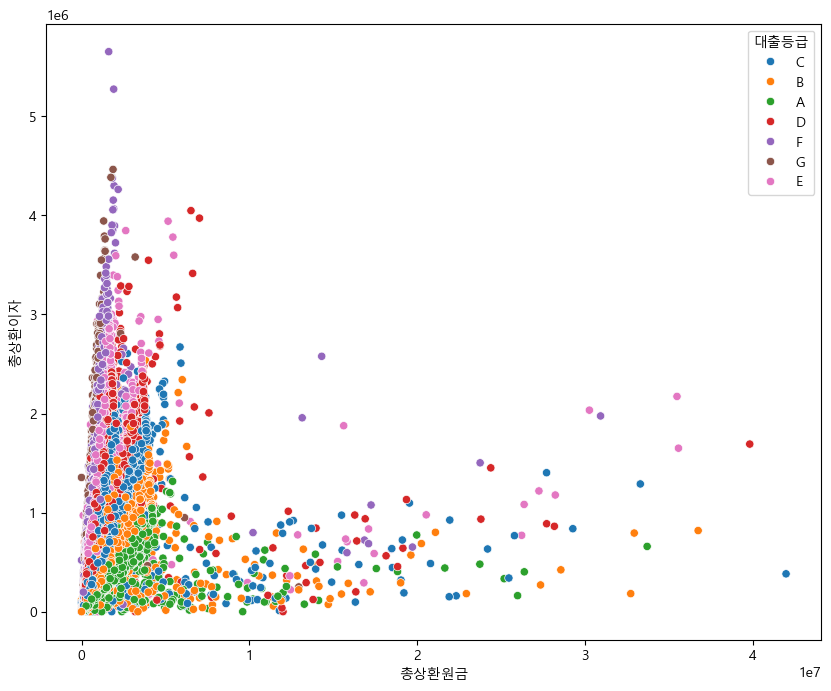

In [16]:
# 산점도
plt.figure(figsize=(10,8))
sns.scatterplot(data=train_df,x ='총상환원금',y='총상환이자', hue= '대출등급')

object 변수 막대 그래프

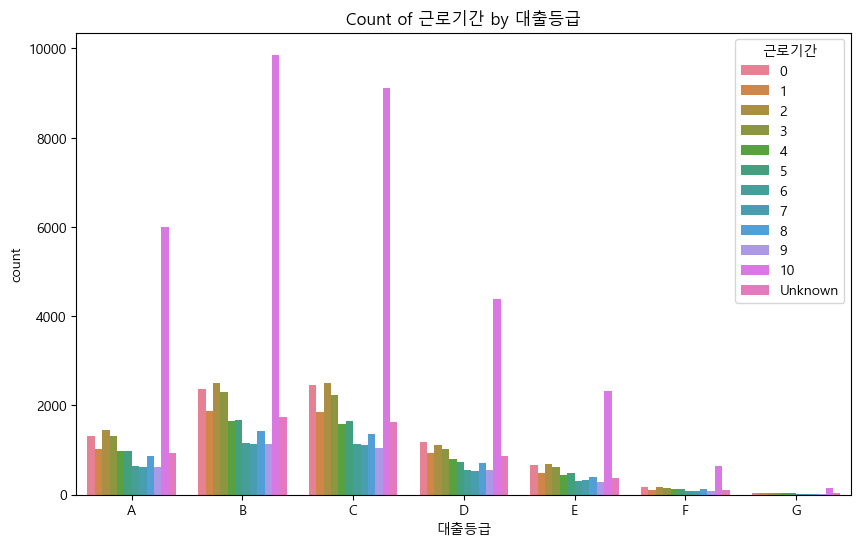

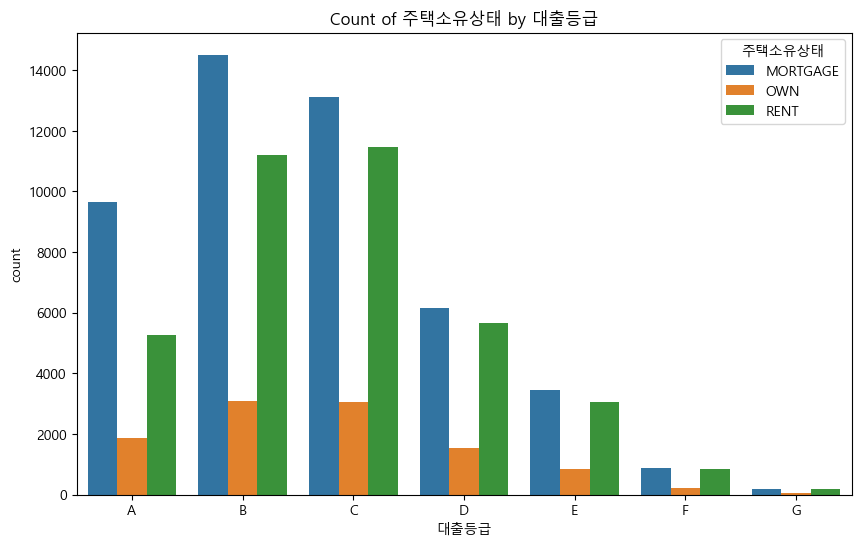

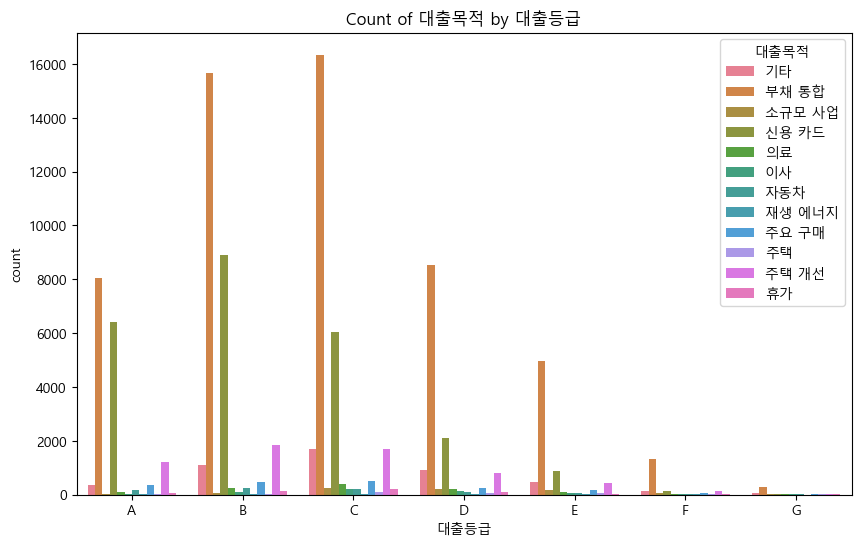

In [17]:
object_columns = object_data.select_dtypes(include=[object])

for column in object_columns.columns:
    if column != '대출등급': 
        count_data = object_data.groupby(['대출등급', column]).size().reset_index(name='count')
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x='대출등급', y='count', hue=column, data=count_data)
        plt.title(f'Count of {column} by 대출등급')
        plt.show()

이산변수 막대 그래프

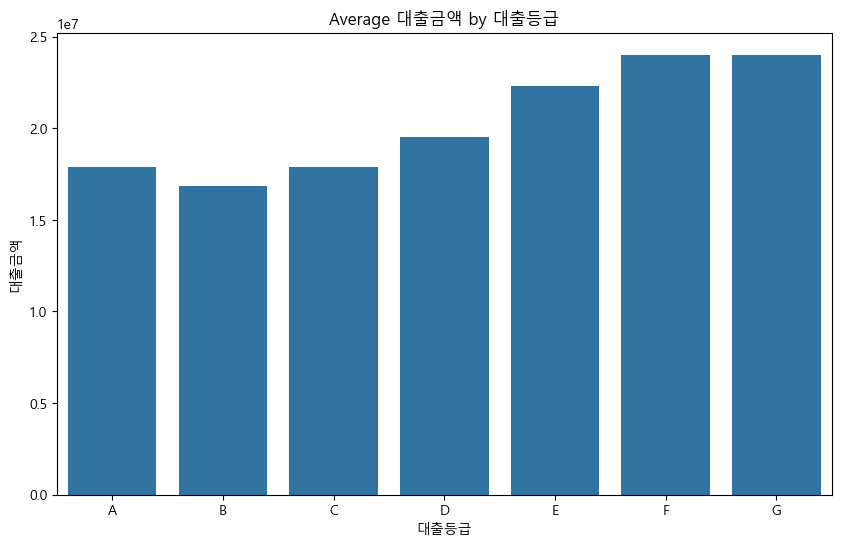

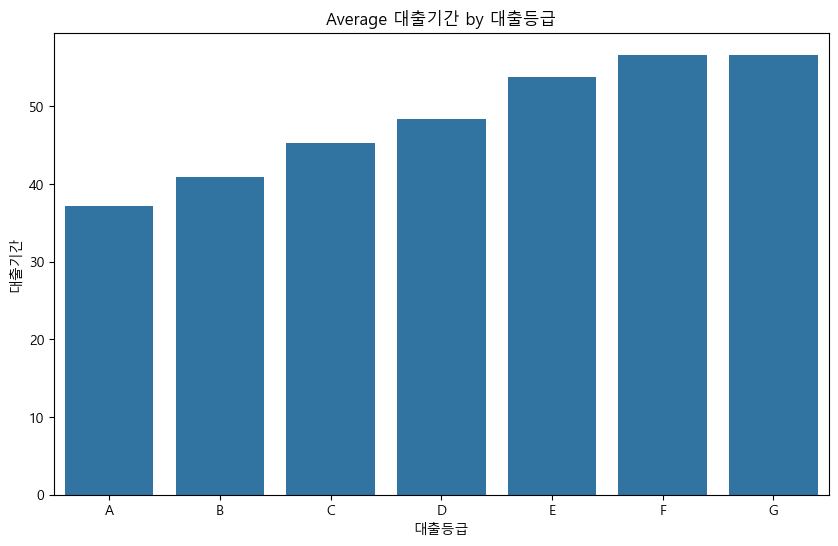

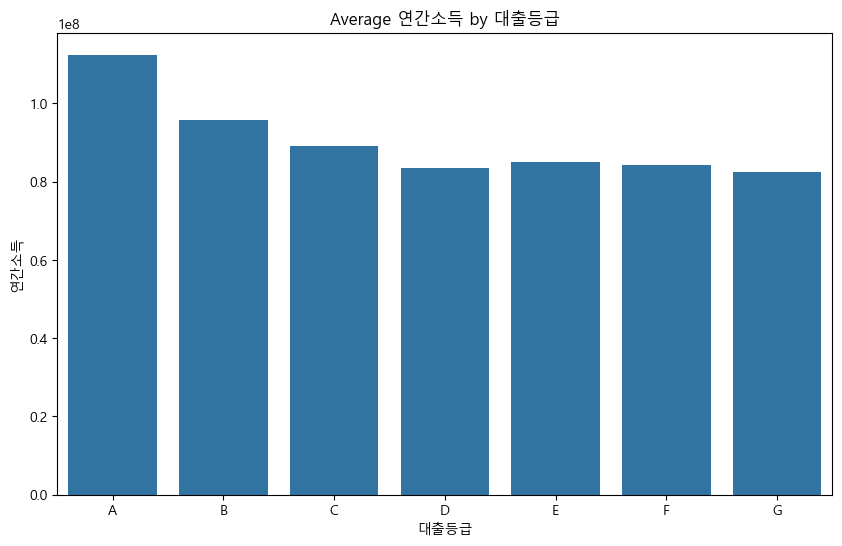

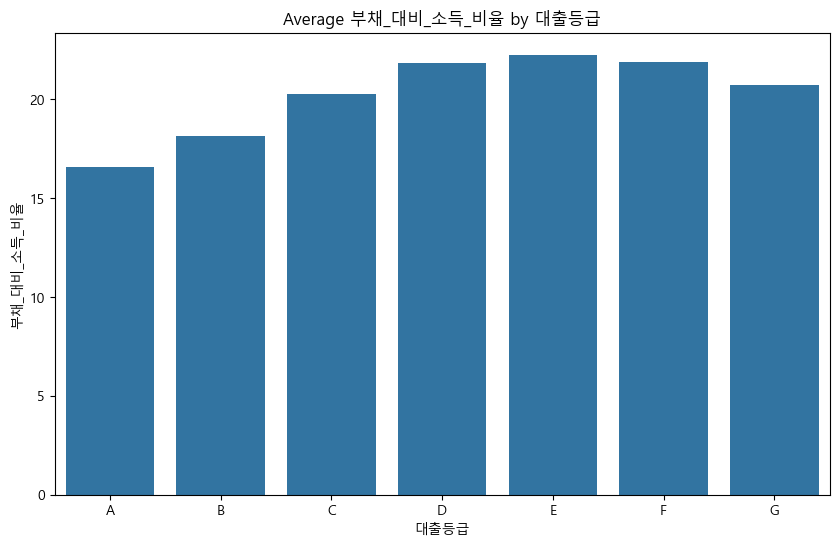

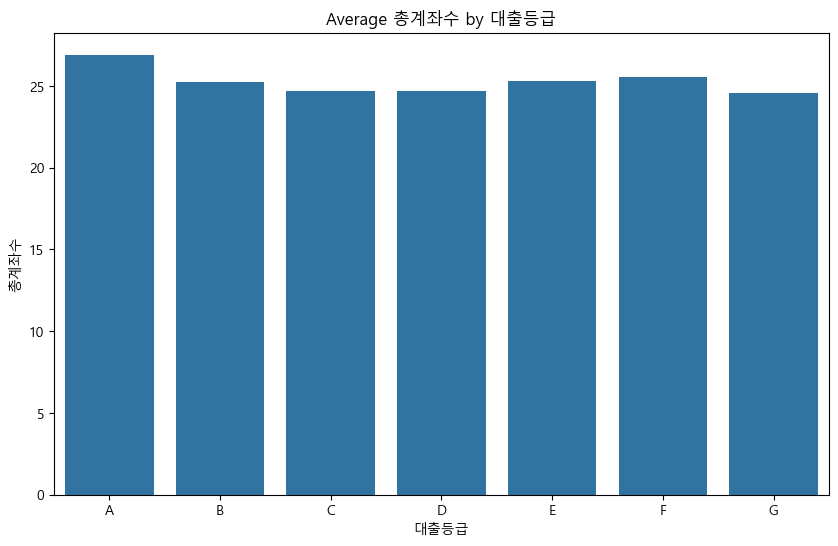

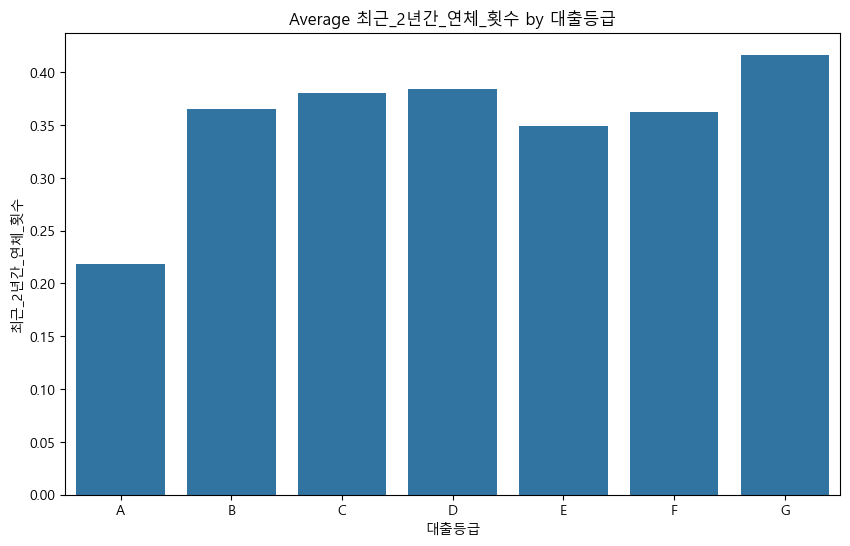

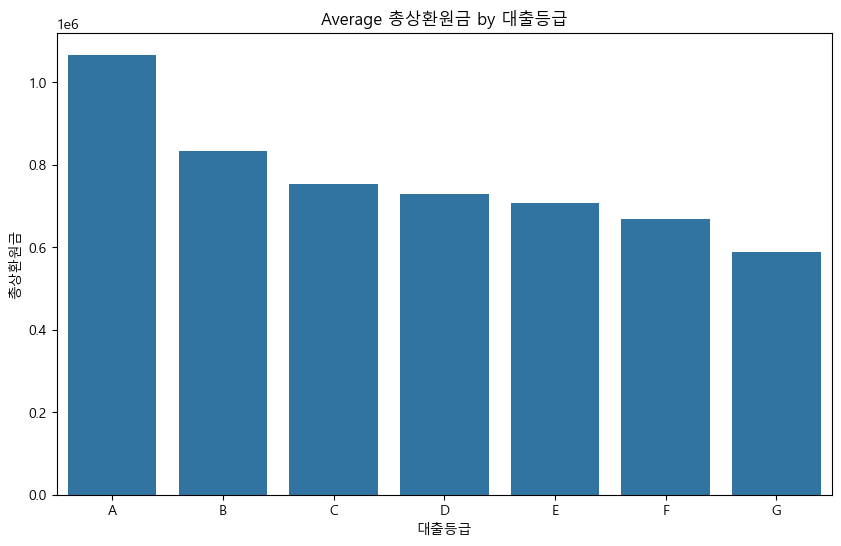

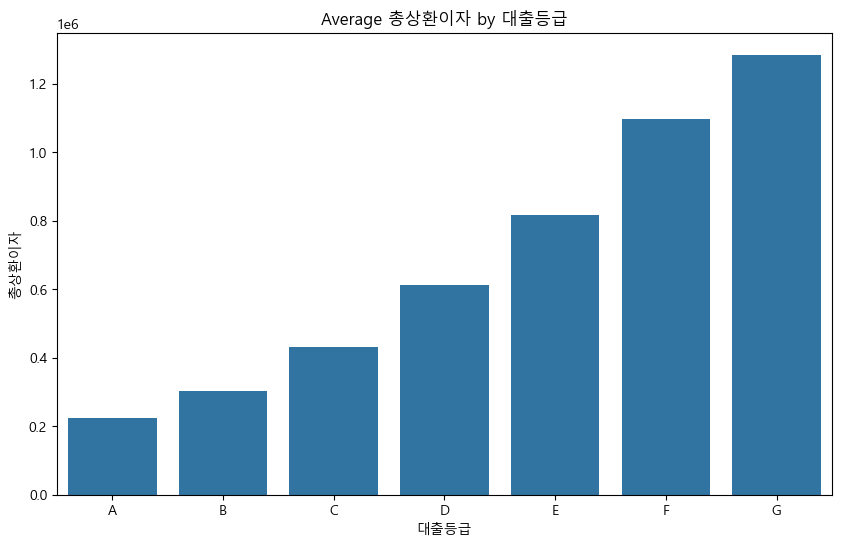

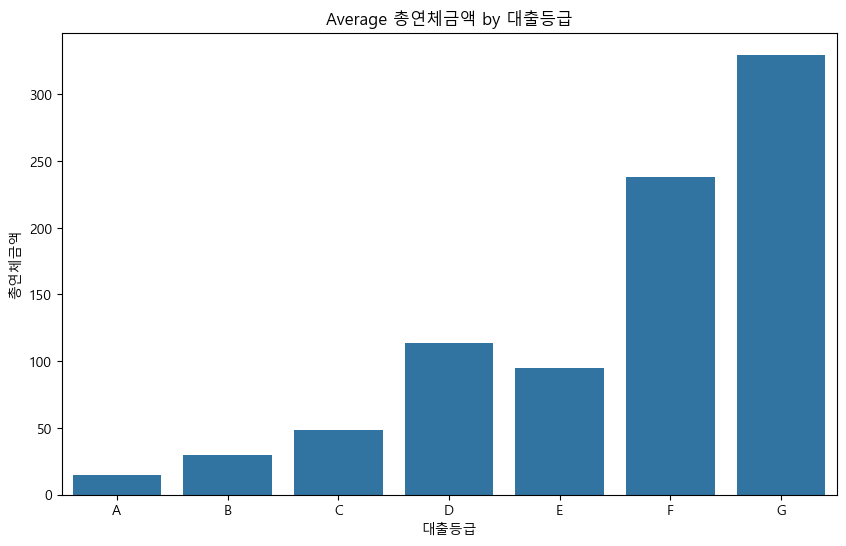

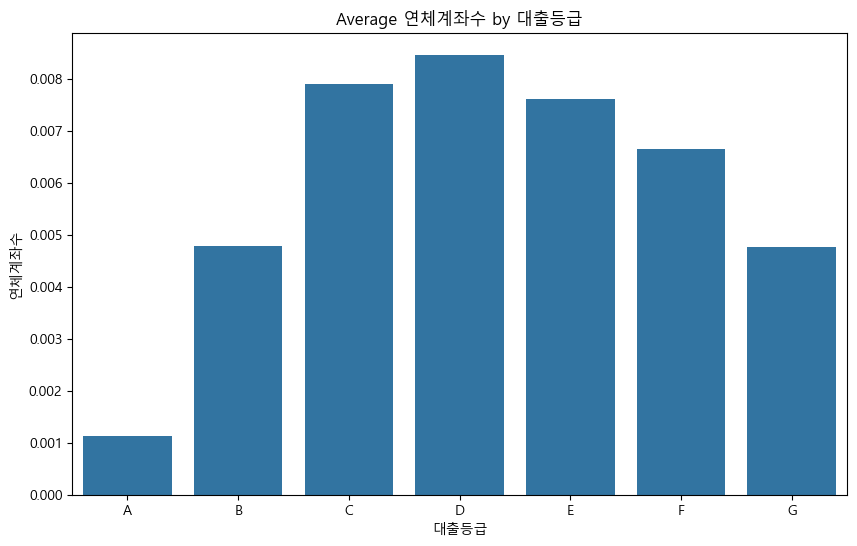

In [18]:
grouped_data = num_data.groupby('대출등급').mean().reset_index()

for column in grouped_data.columns:
    if grouped_data[column].dtype in ['float64', 'int64'] and column != '대출등급':
        plt.figure(figsize=(10, 6))
        sns.barplot(x='대출등급', y=column, data=grouped_data)
        plt.title(f'Average {column} by 대출등급')
        plt.show()

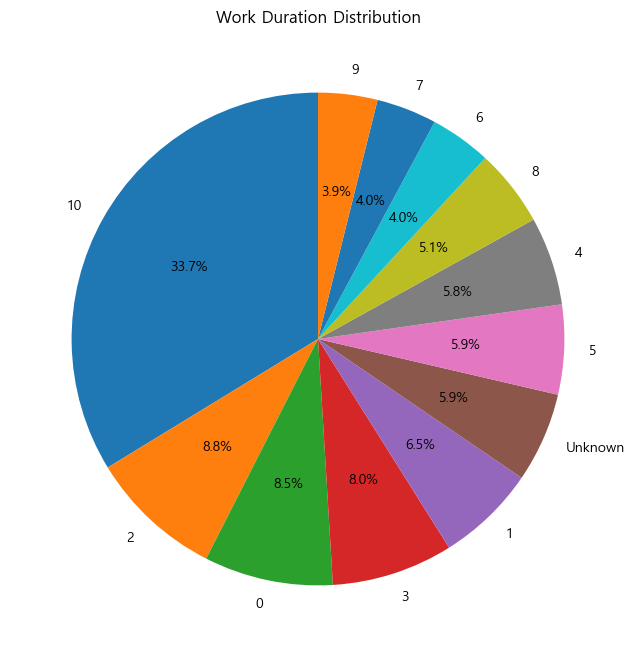

In [19]:
work_duration_counts = train_df['근로기간'].value_counts()
plt.figure(figsize=(10, 8))  
work_duration_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)  
plt.title('Work Duration Distribution')  
plt.ylabel('')  
plt.show()  

지금 신용등급이 낮은 데이터가 현저하게 적음
반대로 A등급 같은 경우 10+ 많이 나타남
우리가 가지고 있는데이터에는 근무 기간 10년 이상이 가장 많음 주의해서 봐야함>>신용등급A가 10+ 나왔다고 유의미한가? 단순이 10+데이터가 많아서 나온거 일 수도 있음

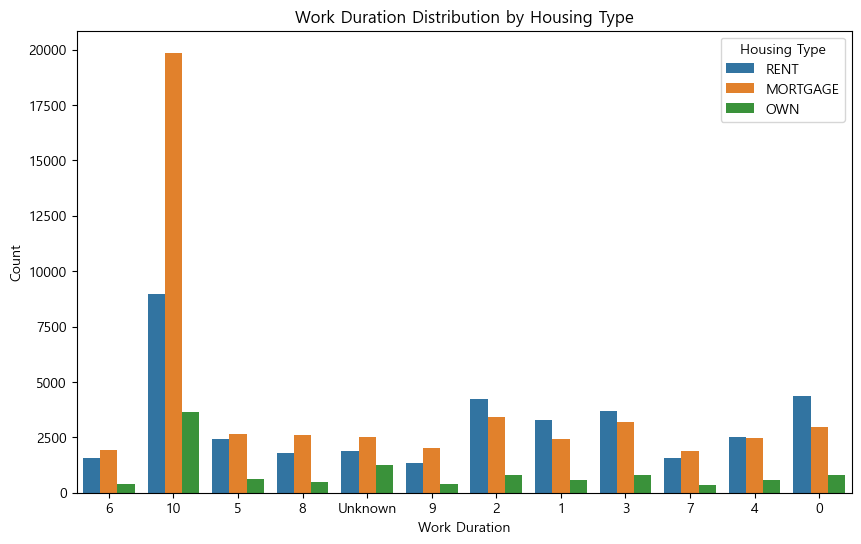

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='근로기간', hue='주택소유상태', data=train_df)
plt.title('Work Duration Distribution by Housing Type')
plt.xlabel('Work Duration')
plt.ylabel('Count')
plt.legend(title='Housing Type')
plt.show()

근무 기간 별로 주택의 소유 상태를 확인해봄
모기지의 형태가 10+ 앞도적으로 나오는 상태임, 다른 근무기간에서는 찾기 힘듬
반대로 근무기간이 낮으면 랜트의 형식이 많음
이는 10+ 고수익은 안정적으로 주택담보로 대출이 가능하다는 것을 나타내고, 근무기간이 낮은 사람들은 그것이 불가능하다는 것을 알려주고 있음.
결론 기관에서 대출을 해줄땐 근무기간이 길면 장기적으로 안정적으로 받을수 있는 모기지, 근무기간이 낮으면 단기로 확실하게 받아야하는 랜트임

In [21]:
train_df['근로기간'].unique()

array([6, 10, 5, 8, 'Unknown', 9, 2, 1, 3, 7, 4, 0], dtype=object)

C:\Users\DOHS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


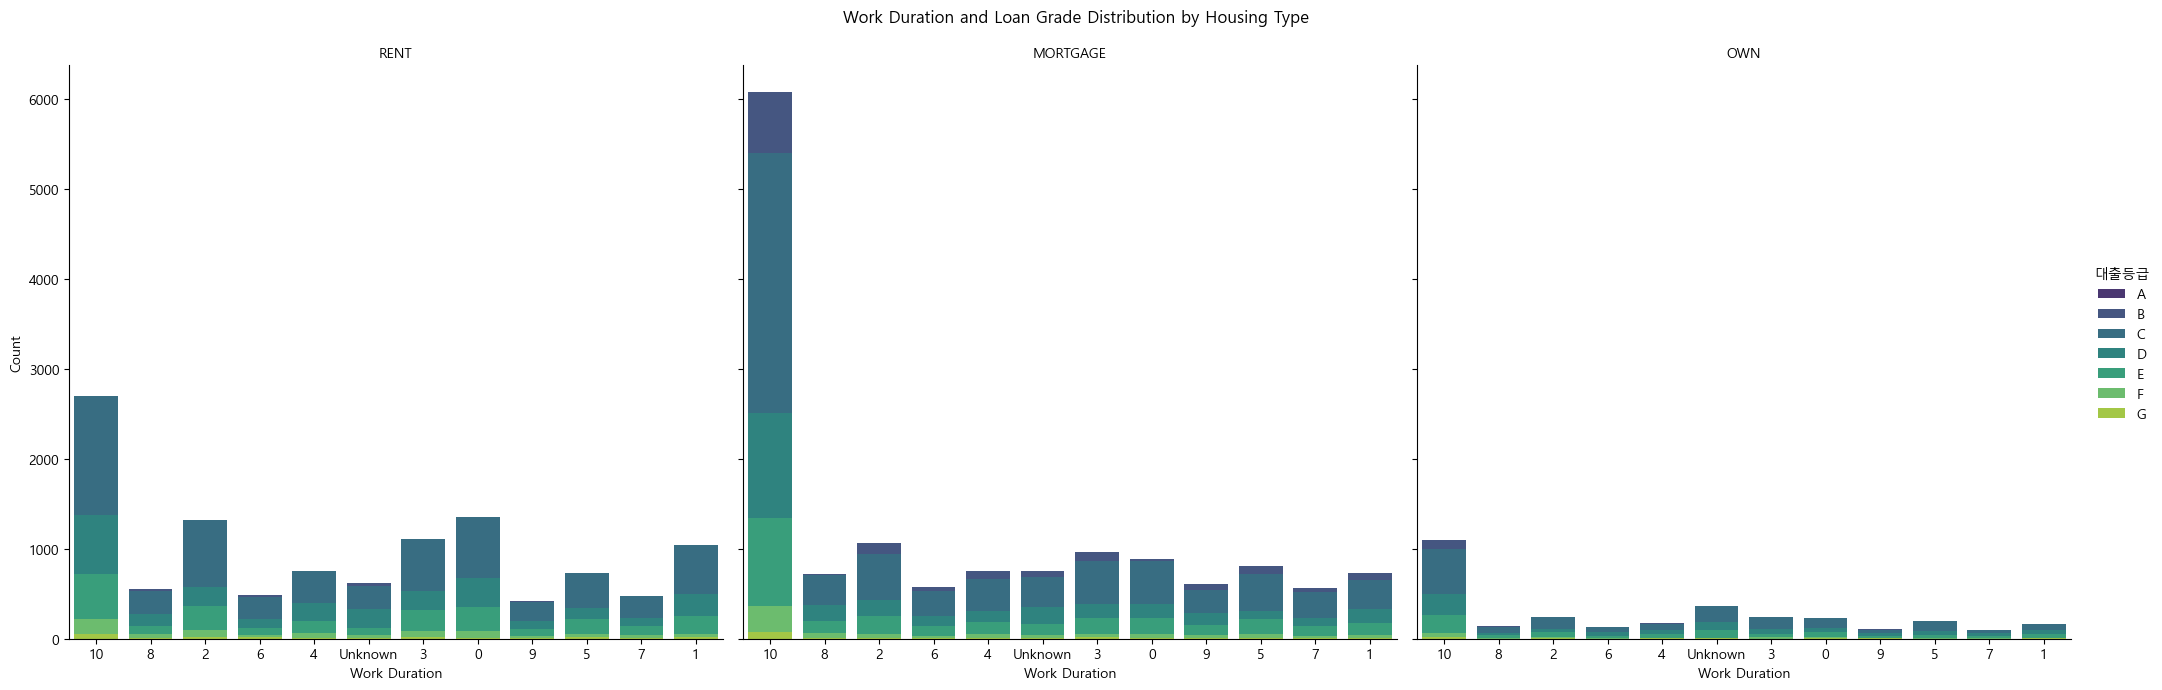

In [22]:

train_df['대출등급'] = pd.Categorical(train_df['대출등급'], categories=sorted(train_df['대출등급'].unique()))

g = sns.FacetGrid(train_df, col="주택소유상태", hue="대출등급", height=7, aspect=1, palette='viridis')

g.map(sns.countplot, "근로기간", hue_order=sorted(train_df['대출등급'].unique()))

g.add_legend(title='대출등급')
g.set_titles("{col_name}")
g.set_xlabels('Work Duration')
g.set_ylabels('Count')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Work Duration and Loan Grade Distribution by Housing Type')

# Display the plot
plt.show()

실제로 주택소유유형별로 신용등급이 어떻게 포진되어있는지 확인해볼 필요가 있음
예상한 결과대로 안정적으로 길게 받을수 있는 유형인 10+ 모기지 형태는 기관에서 A 신용등급을 받고있음
신용등급 A는 [모기지]에서만 보이는 특징임
근무년수에 따른 나머지 신용등급 분포는 고르게 분포되어있음

C:\Users\DOHS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


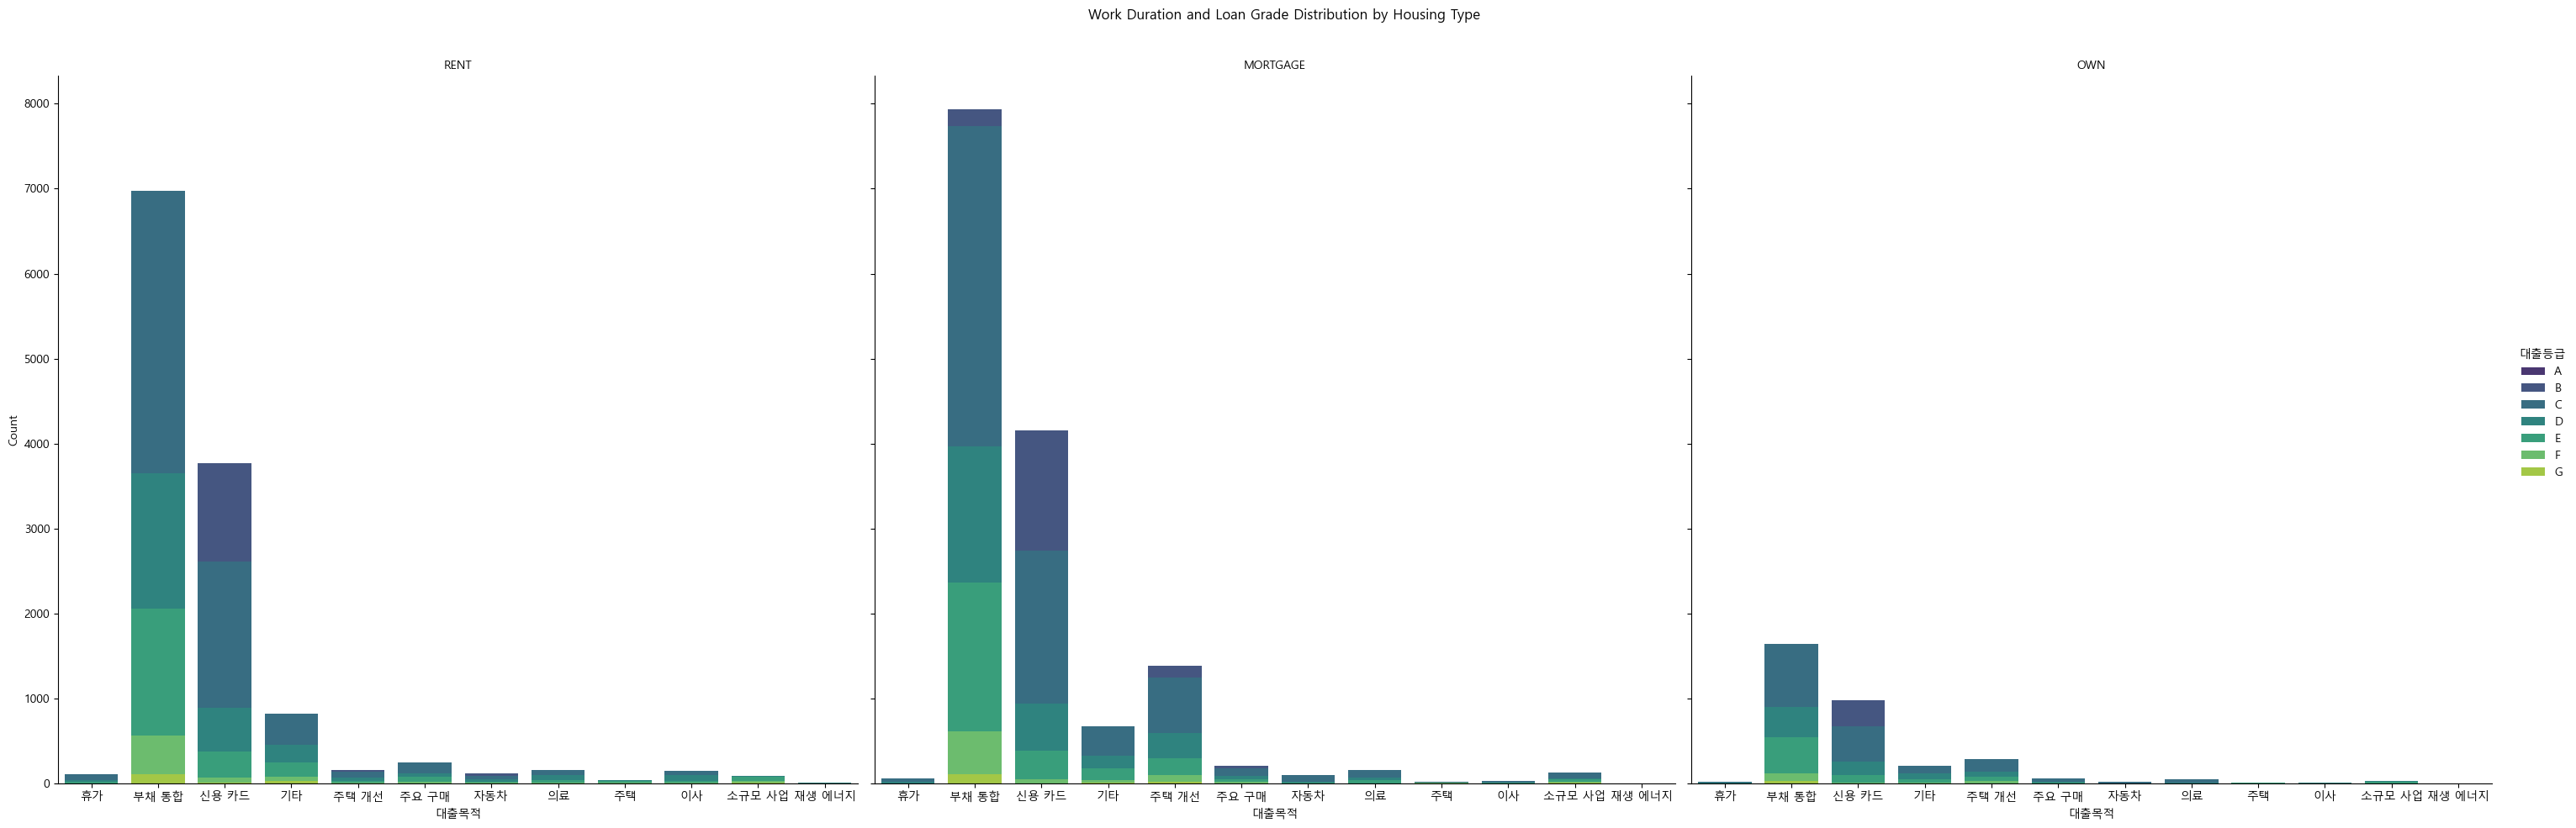

In [23]:

train_df['대출등급'] = pd.Categorical(train_df['대출등급'], categories=sorted(train_df['대출등급'].unique()))

g = sns.FacetGrid(train_df, col="주택소유상태", hue="대출등급", height=10, aspect=1, palette='viridis')

g.map(sns.countplot, "대출목적", hue_order=sorted(train_df['대출등급'].unique()))

g.add_legend(title='대출등급')
g.set_titles("{col_name}")
g.set_xlabels('대출목적')
g.set_ylabels('Count')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Work Duration and Loan Grade Distribution by Housing Type')

# Display the plot
plt.show()

주택소유를 좀더 잘 관찰하기 위해 유형별 어떤 대출유형을 주로 하는 지 파악해봄
의미있는 파악은 못했지만
유독 신용카드에서 신용등급이 많이 나옴
신용카드 부분에서 A 는 종류없이 존재함
낮은 신용등급의 판단은 부채 통합에서 결정되는 거 같음

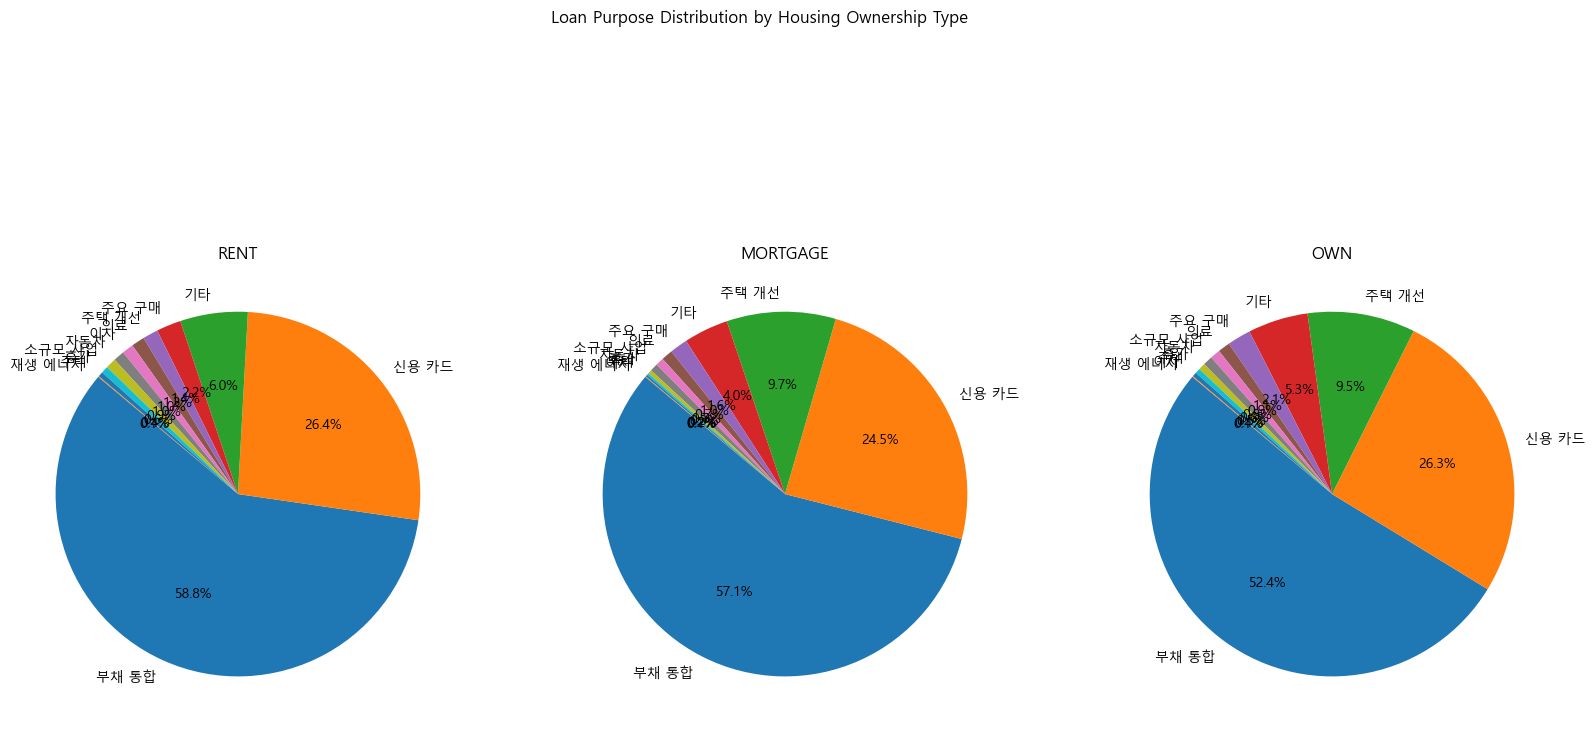

In [24]:
grouped = train_df.groupby('주택소유상태')['대출목적'].value_counts(normalize=True)

unique_housing_types = train_df['주택소유상태'].unique()
fig, axes = plt.subplots(1, len(unique_housing_types), figsize=(20, 10))

for ax, housing_type in zip(axes, unique_housing_types):

    data = grouped[housing_type]
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(housing_type)

plt.suptitle('Loan Purpose Distribution by Housing Ownership Type')
plt.show()

그러면 실제로 다들 신용카드에 사용이 많은가 확인해 봤음, 적은대도 많으면 신용카드로 신용평가가 이루어지나 생각했음
예상대로 큰 비중을 차지하고 있고 나머진 부채통합을 가장 큰 대출유형으로 대출하고있음
즉 , 대출 비중이 가장 많은건 부채 통합 ,A등급을 판단 하는 요소는 신용카드인거 같음(추측)

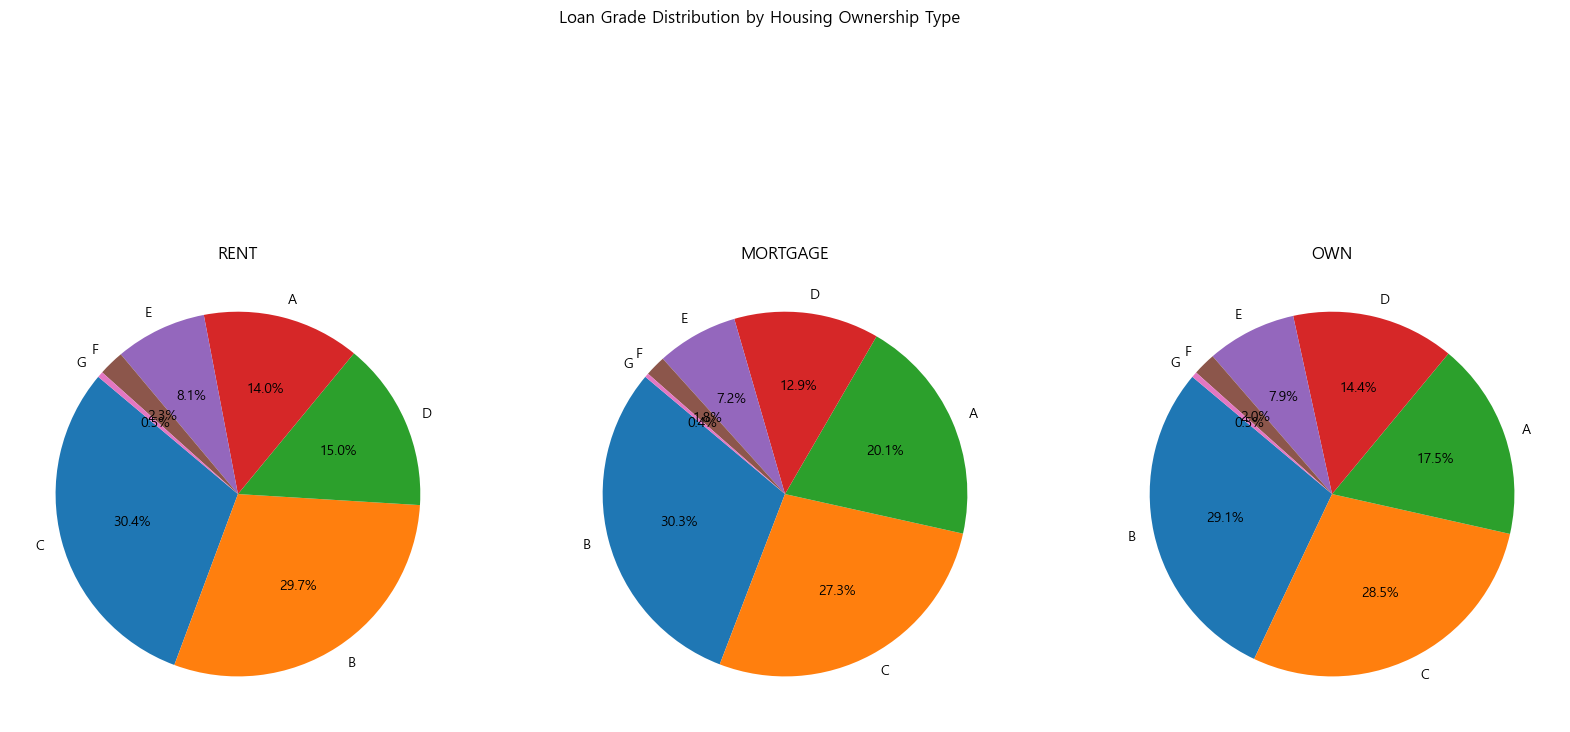

In [25]:

grouped = train_df.groupby('주택소유상태')['대출등급'].value_counts(normalize=True)

unique_housing_types = train_df['주택소유상태'].unique()
fig, axes = plt.subplots(1, len(unique_housing_types), figsize=(20, 10))

for ax, housing_type in zip(axes, unique_housing_types):
    data = grouped[housing_type]
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(housing_type)
plt.suptitle('Loan Grade Distribution by Housing Ownership Type')
plt.show()

C:\Users\DOHS\AppData\Local\Temp\ipykernel_13340\4128870903.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_housing = train_df.groupby(['대출등급', '주택소유상태']).size().unstack().fillna(0)


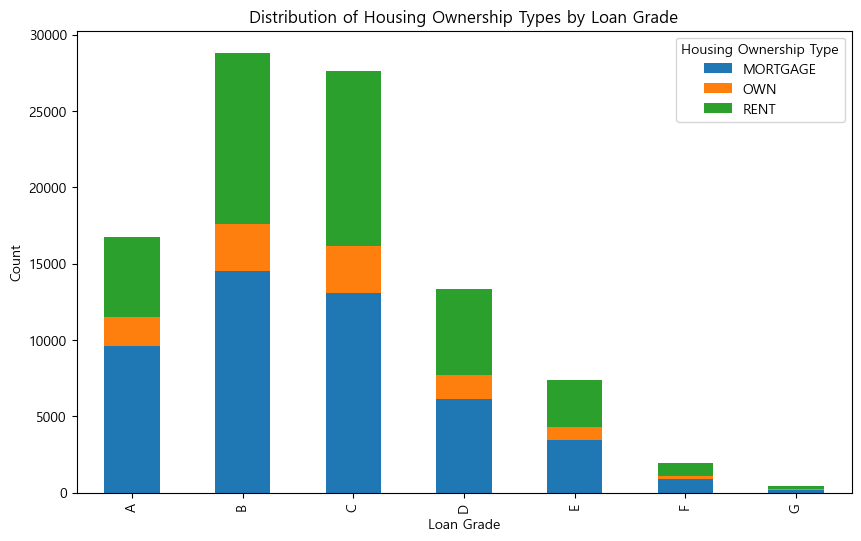

In [26]:
grouped_housing = train_df.groupby(['대출등급', '주택소유상태']).size().unstack().fillna(0)

grouped_housing.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Distribution of Housing Ownership Types by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.legend(title='Housing Ownership Type')
plt.show()

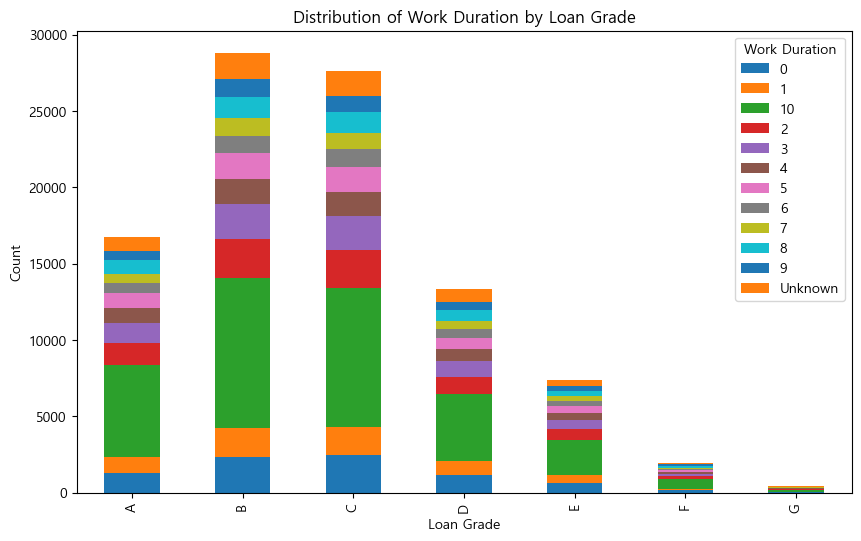

In [27]:
train_df['근로기간'] = train_df['근로기간'].astype(str)

grouped_work = train_df.groupby(['대출등급', '근로기간'], observed=True).size().unstack().fillna(0)

grouped_work.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Distribution of Work Duration by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.legend(title='Work Duration', loc='upper right')
plt.show()

위에서 가정이 맞음을 확인 할 수있음
모기지의 형태,10+ 가 가장 좋은 신용등급을 받는 요소인거 같음 (추측)

C:\Users\DOHS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


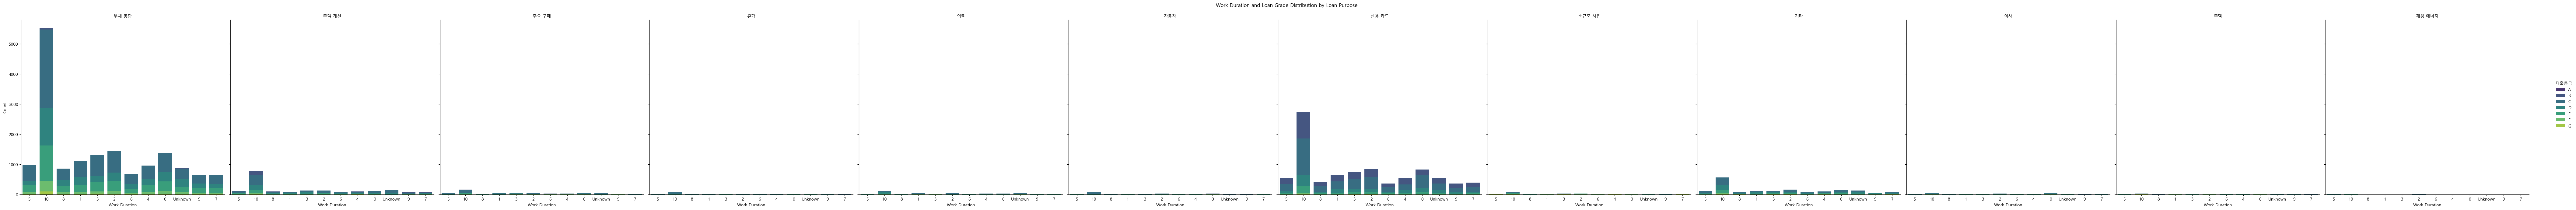

In [28]:
train_df['대출등급'] = pd.Categorical(train_df['대출등급'], categories=sorted(train_df['대출등급'].unique()))

g = sns.FacetGrid(train_df, col="대출목적", hue="대출등급", height=7, aspect=1, palette='viridis')

g.map(sns.countplot, "근로기간", hue_order=sorted(train_df['대출등급'].unique()))

g.add_legend(title='대출등급')
g.set_titles("{col_name}")
g.set_xlabels('Work Duration')
g.set_ylabels('Count')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Work Duration and Loan Grade Distribution by Loan Purpose')

plt.show()

신용카드에 A가 많은 이유는 신용카드의 산정 방식 자체 같음
그리고 느낀 핵심은 부채통합과 신용카드 주택새건 이 셋이 대출을 하는 주 목적임을 알아냈음
10+ 이상의 사람들이 경제 활동이 가장 활발한거 같음 (확인 필요)

위까지는 A등급의 특징들임

In [29]:
train_df

대출금액  대출기간     근로기간    주택소유상태       연간소득  부채_대비_소득_비율  총계좌수  \
ID                                                                             
TRAIN_00000  12480000  36.0        6      RENT   72000000        18.90    15   
TRAIN_00001  14400000  60.0       10  MORTGAGE  130800000        22.33    21   
TRAIN_00002  12000000  36.0        5  MORTGAGE   96000000         8.60    14   
TRAIN_00003  14400000  36.0        8  MORTGAGE  132000000        15.09    15   
TRAIN_00004  18000000  60.0  Unknown      RENT   71736000        25.39    19   
...               ...   ...      ...       ...        ...          ...   ...   
TRAIN_96289  14400000  36.0       10  MORTGAGE  210000000         9.33    33   
TRAIN_96290  28800000  60.0       10  MORTGAGE  132000000         5.16    25   
TRAIN_96291  14400000  36.0        1  MORTGAGE   84000000        11.24    22   
TRAIN_96292  15600000  36.0        5  MORTGAGE   66330000        17.30    21   
TRAIN_96293   8640000  36.0       10      RENT   50400000        11.80    14   

              대출목적  최근_2년간_연체_횟수    총상환원금     총상환이자  총연체금액  연체계좌수 대출등급  
ID                                                                      
TRAIN_00000  부채 통합             0        0       0.0    0.0    0.0    C  
TRAIN_00001  주택 개선             0   373572  234060.0    0.0    0.0    B  
TRAIN_00002  부채 통합             0   928644  151944.0    0.0    0.0    A  
TRAIN_00003  부채 통합             0   325824  153108.0    0.0    0.0    C  
TRAIN_00004  주요 구매             0   228540  148956.0    0.0    0.0    B  
...            ...           ...      ...       ...    ...    ...  ...  
TRAIN_96289  신용 카드             0   974580  492168.0    0.0    0.0    C  
TRAIN_96290  주택 개선             0   583728  855084.0    0.0    0.0    E  
TRAIN_96291  신용 카드             0  1489128  241236.0    0.0    0.0    A  
TRAIN_96292  부채 통합             2  1378368  818076.0    0.0    0.0    D  
TRAIN_96293  신용 카드             0   596148  274956.0    0.0    0.0    C  

[96294 rows x 14 columns]

C:\Users\DOHS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


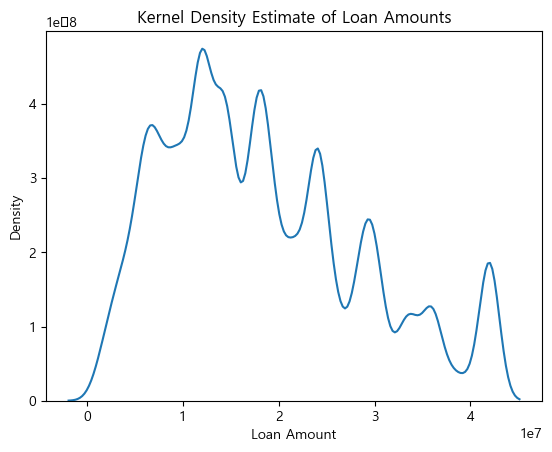

In [30]:
sns.kdeplot(data=train_df, x='대출금액')

plt.title('Kernel Density Estimate of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.show()

C:\Users\DOHS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


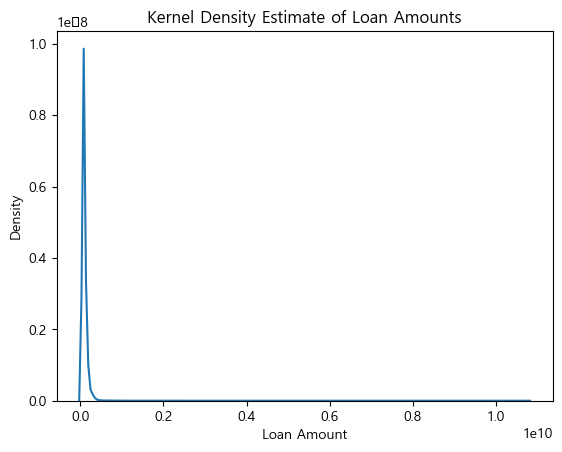

In [35]:
sns.kdeplot(data=train_df, x='연간소득')

plt.title('Kernel Density Estimate of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.show()

In [36]:
train_df['대출금액'].describe()

count    9.629400e+04
mean     1.830400e+07
std      1.032908e+07
min      1.200000e+06
25%      1.020000e+07
50%      1.680000e+07
75%      2.400000e+07
max      4.200000e+07
Name: 대출금액, dtype: float64

In [37]:
train_df['연간소득'].describe()

count    9.629400e+04
mean     9.392672e+07
std      9.956871e+07
min      0.000000e+00
25%      5.760000e+07
50%      7.800000e+07
75%      1.128000e+08
max      1.080000e+10
Name: 연간소득, dtype: float64

In [38]:
train_df['LoanAmountQuartile'] = pd.qcut(train_df['대출금액'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

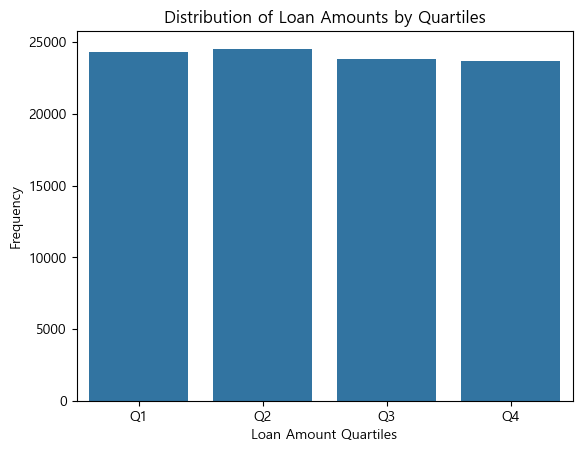

In [39]:
quartile_counts = train_df['LoanAmountQuartile'].value_counts().sort_index()

sns.barplot(x=quartile_counts.index, y=quartile_counts.values)

plt.title('Distribution of Loan Amounts by Quartiles')
plt.xlabel('Loan Amount Quartiles')
plt.ylabel('Frequency')
plt.show()

In [40]:
train_df['yearsincomeQuartile'] = pd.qcut(train_df['연간소득'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

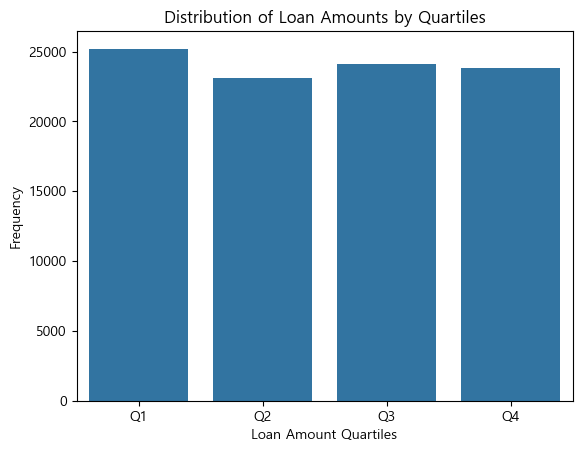

In [41]:
quartile_counts = train_df['yearsincomeQuartile'].value_counts().sort_index()

sns.barplot(x=quartile_counts.index, y=quartile_counts.values)

plt.title('Distribution of Loan Amounts by Quartiles')
plt.xlabel('Loan Amount Quartiles')
plt.ylabel('Frequency')
plt.show()

In [42]:
train_df.columns

Index(['대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수', '대출목적',
       '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급',
       'yearsincomeQuartile', 'LoanAmountQuartile'],
      dtype='object')

In [44]:
train_df.pivot_table(index=['근로기간'],columns='대출등급',values=['대출금액','연간소득'],aggfunc='mean')

대출금액                                                          \
대출등급                A             B             C             D             E   
근로기간                                                                            
0        1.745954e+07  1.623307e+07  1.688419e+07  1.882581e+07  2.118948e+07   
1        1.765563e+07  1.597760e+07  1.674177e+07  1.840165e+07  2.121231e+07   
10       1.879930e+07  1.809120e+07  1.951904e+07  2.145480e+07  2.436302e+07   
2        1.725829e+07  1.657941e+07  1.701136e+07  1.888734e+07  2.118432e+07   
3        1.744451e+07  1.644933e+07  1.752903e+07  1.868702e+07  2.136947e+07   
4        1.792455e+07  1.664821e+07  1.751996e+07  1.917113e+07  2.135189e+07   
5        1.734831e+07  1.677005e+07  1.754708e+07  1.879969e+07  2.231229e+07   
6        1.813680e+07  1.641697e+07  1.766768e+07  1.955077e+07  2.378230e+07   
7        1.803688e+07  1.645460e+07  1.789425e+07  1.929191e+07  2.303217e+07   
8        1.730609e+07  1.689832e+07  1.848220e+07  2.004539e+07  2.207166e+07   
9        1.798382e+07  1.750860e+07  1.863143e+07  1.971506e+07  2.203879e+07   
Unknown  1.554639e+07  1.315398e+07  1.332536e+07  1.440162e+07  1.657865e+07   

                                             연간소득                              \
대출등급                F             G             A             B             C   
근로기간                                                                            
0        2.186241e+07  1.938000e+07  1.089115e+08  8.817066e+07  8.522562e+07   
1        2.225400e+07  2.470759e+07  1.066027e+08  9.041137e+07  8.303698e+07   
10       2.630917e+07  2.670263e+07  1.199666e+08  1.058449e+08  9.813130e+07   
2        2.296076e+07  2.333250e+07  1.085316e+08  9.292176e+07  8.539712e+07   
3        2.135784e+07  2.341462e+07  1.128800e+08  9.203984e+07  8.718926e+07   
4        2.486680e+07  2.327880e+07  1.125600e+08  9.565855e+07  8.610673e+07   
5        2.374059e+07  2.516125e+07  1.117908e+08  9.575186e+07  8.936819e+07   
6        2.282153e+07  2.504368e+07  1.168882e+08  9.503406e+07  8.678141e+07   
7        2.424494e+07  1.984091e+07  1.250902e+08  9.689824e+07  8.640570e+07   
8        2.552812e+07  2.664300e+07  1.091748e+08  9.521531e+07  9.349182e+07   
9        2.548059e+07  2.065667e+07  1.126498e+08  9.611901e+07  9.647943e+07   
Unknown  1.655674e+07  1.816320e+07  7.379123e+07  6.281029e+07  5.619573e+07   

                                                                 
대출등급                D             E             F             G  
근로기간                                                             
0        7.648905e+07  7.833257e+07  7.376643e+07  6.425843e+07  
1        7.759490e+07  8.049425e+07  8.146001e+07  9.133672e+07  
10       9.178777e+07  9.205009e+07  9.054751e+07  8.926765e+07  
2        7.980949e+07  8.390610e+07  8.823531e+07  9.669153e+07  
3        8.398700e+07  8.500710e+07  7.981912e+07  8.045234e+07  
4        8.256038e+07  8.098402e+07  9.211190e+07  8.157989e+07  
5        8.580546e+07  8.702076e+07  8.266865e+07  8.707000e+07  
6        8.522148e+07  8.666561e+07  7.873338e+07  7.623512e+07  
7        8.576213e+07  9.151011e+07  8.089923e+07  6.772102e+07  
8        9.124018e+07  8.491499e+07  8.736585e+07  8.338200e+07  
9        8.402781e+07  8.721640e+07  9.073454e+07  7.846667e+07  
Unknown  5.297087e+07  5.322219e+07  5.291253e+07  5.474031e+07

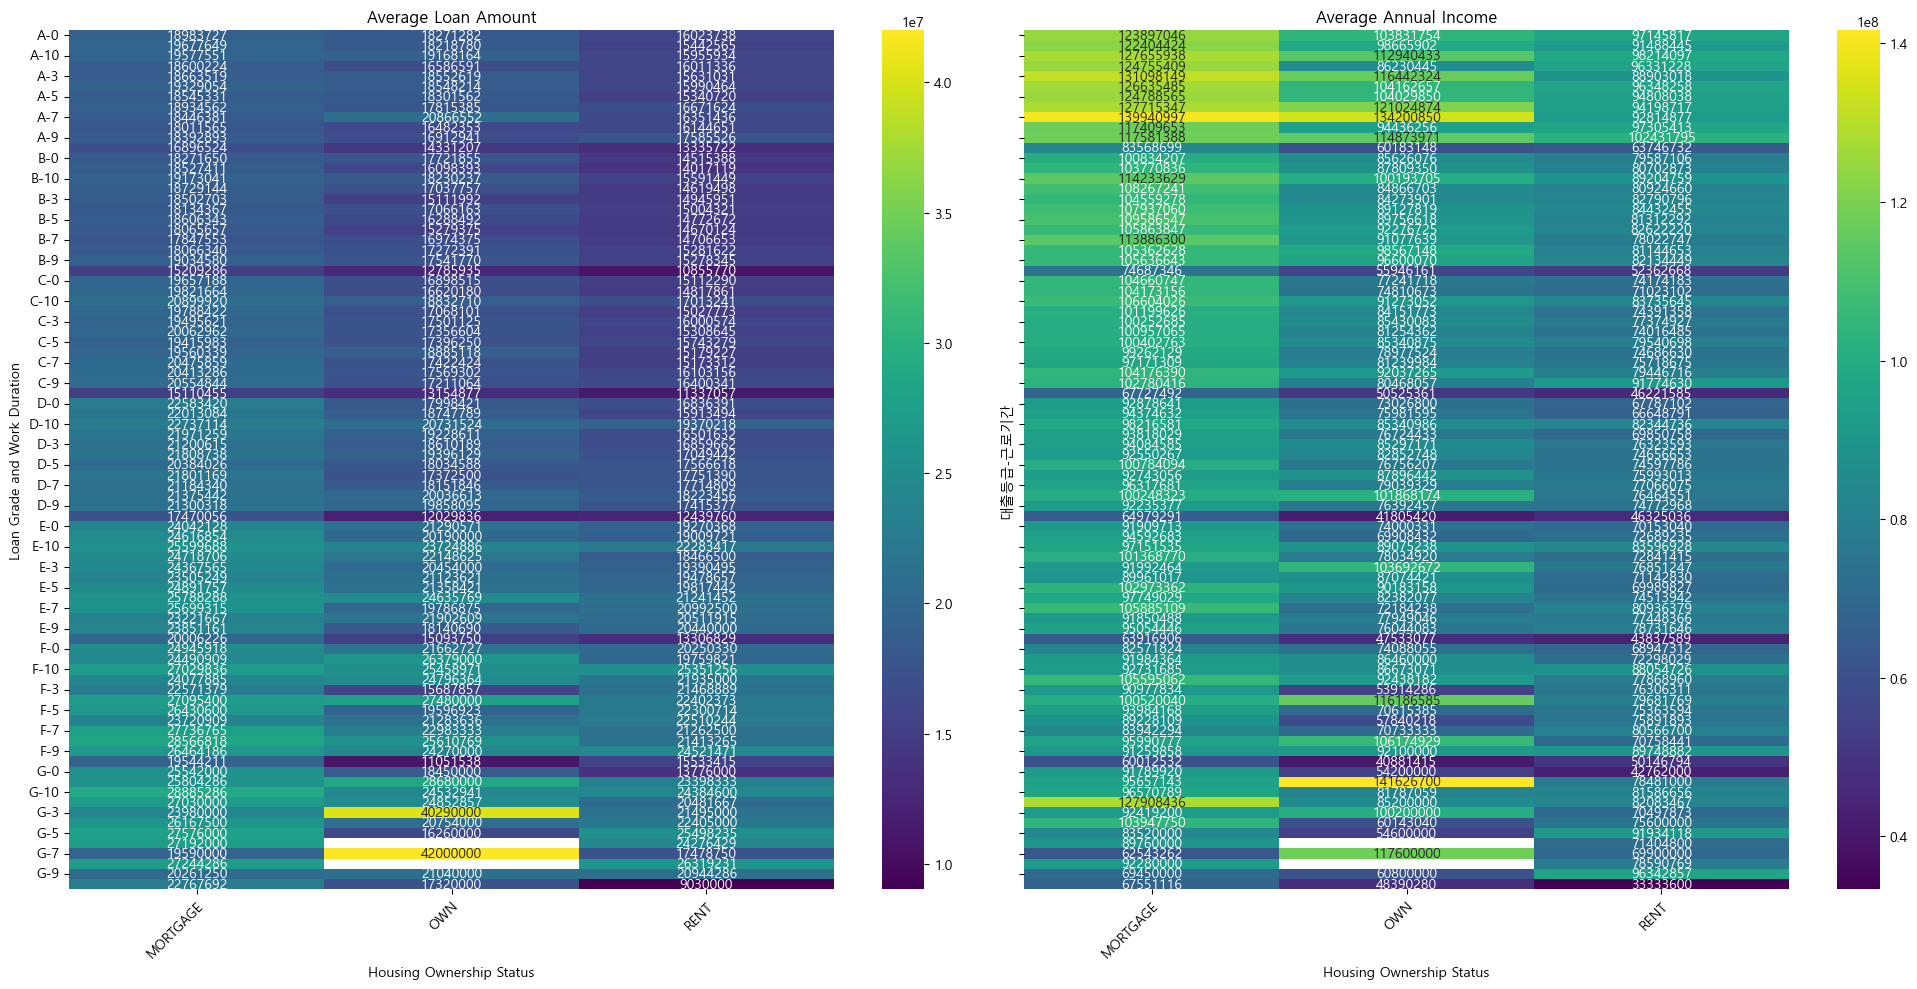

In [45]:
pivot_table = train_df.pivot_table(index=['대출등급', '근로기간'], columns='주택소유상태', values=['대출금액', '연간소득'], aggfunc='mean')

# Set up the matplotlib figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

# Heatmap for average loan amount
sns.heatmap(pivot_table['대출금액'], ax=axes[0], annot=True, fmt=".0f", cmap="viridis")
axes[0].set_title('Average Loan Amount')
axes[0].set_ylabel('Loan Grade and Work Duration')
axes[0].set_xlabel('Housing Ownership Status')

# Heatmap for average annual income
sns.heatmap(pivot_table['연간소득'], ax=axes[1], annot=True, fmt=".0f", cmap="viridis")
axes[1].set_title('Average Annual Income')
axes[1].set_xlabel('Housing Ownership Status')

# Rotate the x-axis labels for better readability
plt.setp(axes[0].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(axes[1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [48]:
import numpy as np

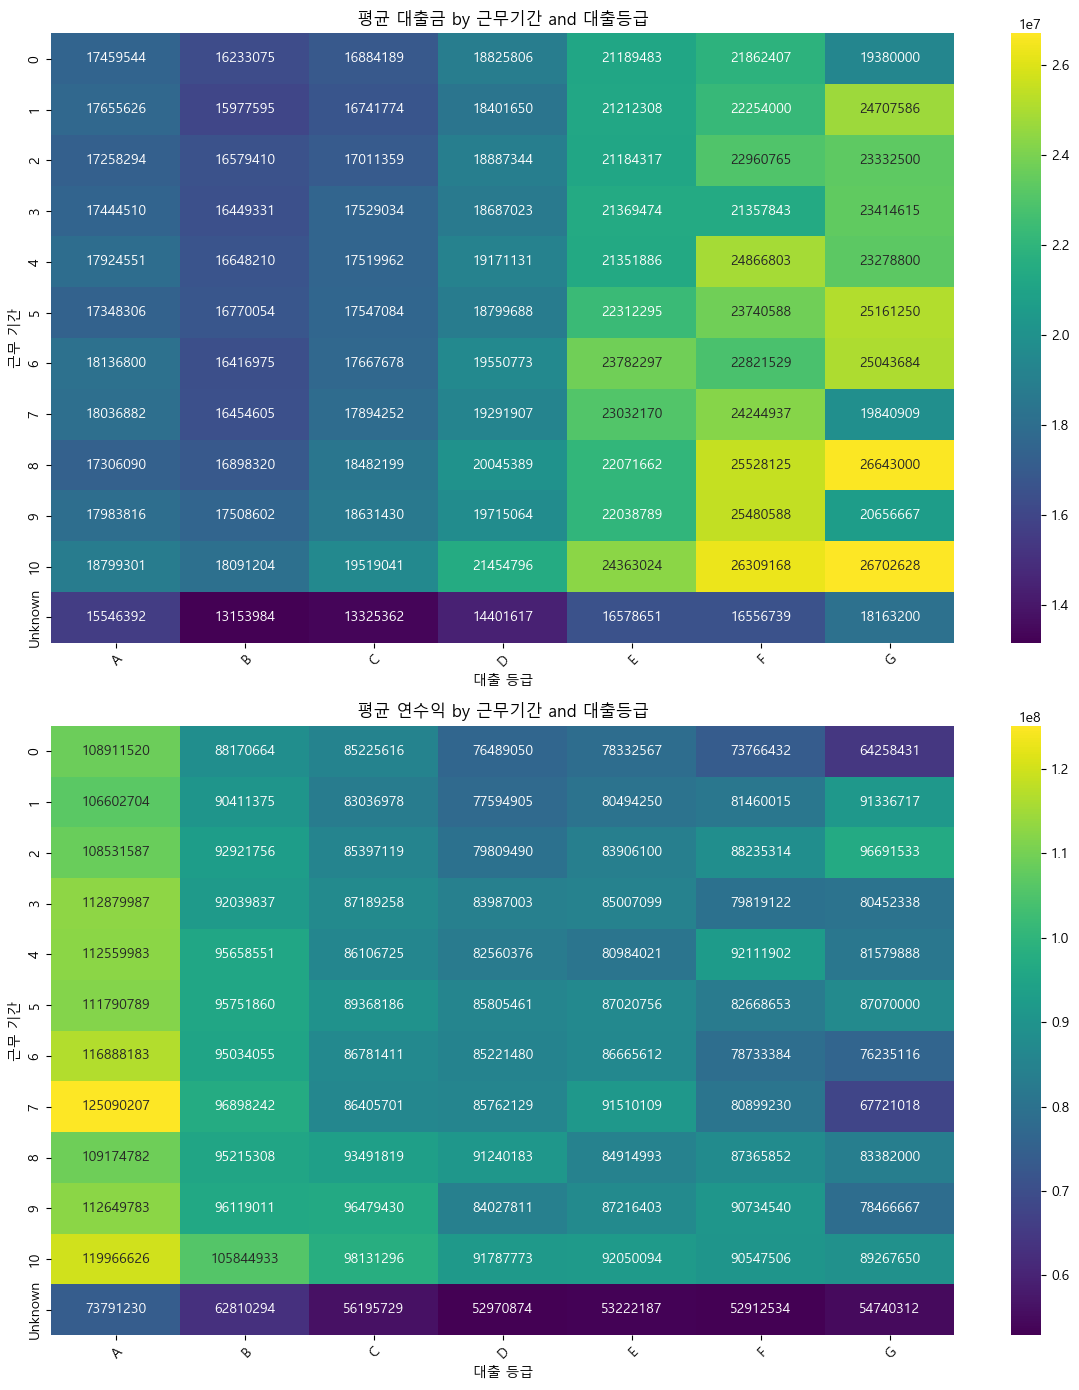

In [49]:
def custom_sort_key(x):
    if x == "Unknown":
        return np.inf 
    try:
        return int(x) 
    except ValueError:
        return np.inf 

train_df['Sorted근로기간'] = train_df['근로기간'].apply(custom_sort_key)
train_data_sorted = train_df.sort_values(by='Sorted근로기간')

loan_amount_pivot = train_data_sorted.pivot_table(index=['Sorted근로기간'], columns='대출등급', values='대출금액', aggfunc='mean')
annual_income_pivot = train_data_sorted.pivot_table(index=['Sorted근로기간'], columns='대출등급', values='연간소득', aggfunc='mean')

loan_amount_pivot.index = loan_amount_pivot.index.map(lambda x: "Unknown" if x == np.inf else str(int(x)))
annual_income_pivot.index = annual_income_pivot.index.map(lambda x: "Unknown" if x == np.inf else str(int(x)))

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 14))

sns.heatmap(loan_amount_pivot, annot=True, fmt=".0f", cmap="viridis", ax=axes[0])
axes[0].set_title('평균 대출금 by 근무기간 and 대출등급')
axes[0].set_xlabel('대출 등급')
axes[0].set_ylabel('근무 기간')

sns.heatmap(annual_income_pivot, annot=True, fmt=".0f", cmap="viridis", ax=axes[1])
axes[1].set_title('평균 연수익 by 근무기간 and 대출등급')
axes[1].set_xlabel('대출 등급')
axes[1].set_ylabel('근무 기간')

# Rotate the x-axis labels for better readability
plt.setp(axes[0].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(axes[1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

평균 대출금 by 근무기간 and 대출등급

확실히 대출 등급이 낮은 사람들은 평균적으로 더 많은 대출금을 받고있음-10+ 유독 높음, 년차가 높아질 수록 대출금이 많아짐,(7->8->9)에서 유독 변동이 심함
대출등급이 높을 수록 빌리는 돈이 낮아짐>경제적으로 안정적이여서 빌릴 돈도 적음> 기관에서는 부담없이 대출을 해줄 수 있다
연 수익 by 근무기간 and 대출등급

6년까지 점점 수익이 늘다가 갑자기 떨어짐 (이시기 무슨 이벤트가 있었는지 모르겠음)
평균 대출금 6->7에서 갑자기 확떨어짐 and 평균 연수익도 같이 확 떨어짐

경제 활동을 하면 대출도 많이 한다, 혹은 이벤트 결혼 준비 이직같은 이벤트 발생, 일시적인 공백 발생 >> 이때 소득이 없다 일자리가 다시생기면 이사비 결혼비 다양한 이유로 대출 다시 시작?

# 근무기간 간격간의 소득이 불안 할 수록 신용등급이 좋지 않다!!
unkown을 제외하고 분석// 오브젝트라 코드에서 에러 뜸

In [56]:
pivot_table=train_df.pivot_table(index='대출등급',columns='근로기간',values='부채_대비_소득_비율')
pivot_table

근로기간          0          1         10          2          3          4  \
대출등급                                                                     
A     15.830706  16.201794  16.903991  15.919243  16.470951  16.231631   
B     17.597747  17.574660  18.416517  17.722563  17.713588  17.713822   
C     19.095276  19.433962  20.290644  19.155138  19.215025  19.504604   
D     20.898781  21.134800  22.229767  20.918491  21.409319  20.417688   
E     21.822052  20.735052  22.597443  21.331727  21.433536  22.411977   
F     21.602531  20.440273  22.495455  20.220471  22.112288  20.478689   
G     17.199615  21.129655  21.069051  21.678889  21.977179  16.784400   

근로기간          5          6          7          8          9    Unknown  
대출등급                                                                    
A     16.262890  16.458738  16.510727  16.678201  16.662367  17.255011  
B     17.996045  17.938349  18.630009  18.198906  18.396684  19.045580  
C     19.676100  19.818941  20.041704  20.230645  20.484080  27.730467  
D     20.770679  21.856280  21.769794  22.017694  22.212991  24.947064  
E     21.789284  23.456182  21.998931  21.818519  22.219516  25.871772  
F     21.492101  23.352353  20.650127  21.543984  21.740000  24.522826  
G     19.725417  22.151579  20.906818  20.595000  17.874444  23.966800

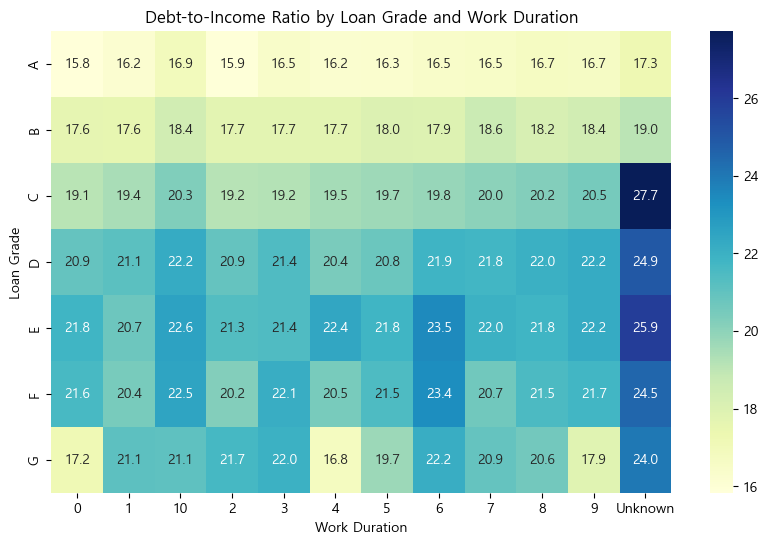

In [57]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title('Debt-to-Income Ratio by Loan Grade and Work Duration')
plt.xlabel('Work Duration')
plt.ylabel('Loan Grade')
plt.show()

등급이 높을 수록 근무기간에 따른 소득의 분산이 크지가 않다는 것을 확인 할 수 있다.
반대로 낮을 수록 근무기간 사이 분산차이가 큼을 알 수가 있었다
위의 과정이 맞는 사실임을 알수 있었다

In [60]:
pivot_table =train_df.pivot_table(index='대출등급',columns='근로기간',values=['부채_대비_소득_비율','연간소득'])
pivot_table

부채_대비_소득_비율                                                         \
근로기간           0          1         10          2          3          4   
대출등급                                                                      
A      15.830706  16.201794  16.903991  15.919243  16.470951  16.231631   
B      17.597747  17.574660  18.416517  17.722563  17.713588  17.713822   
C      19.095276  19.433962  20.290644  19.155138  19.215025  19.504604   
D      20.898781  21.134800  22.229767  20.918491  21.409319  20.417688   
E      21.822052  20.735052  22.597443  21.331727  21.433536  22.411977   
F      21.602531  20.440273  22.495455  20.220471  22.112288  20.478689   
G      17.199615  21.129655  21.069051  21.678889  21.977179  16.784400   

                                                  ...          연간소득  \
근로기간          5          6          7          8  ...            10   
대출등급                                              ...                 
A     16.262890  16.458738  16.510727  16.678201  ...  1.199666e+08   
B     17.996045  17.938349  18.630009  18.198906  ...  1.058449e+08   
C     19.676100  19.818941  20.041704  20.230645  ...  9.813130e+07   
D     20.770679  21.856280  21.769794  22.017694  ...  9.178777e+07   
E     21.789284  23.456182  21.998931  21.818519  ...  9.205009e+07   
F     21.492101  23.352353  20.650127  21.543984  ...  9.054751e+07   
G     19.725417  22.151579  20.906818  20.595000  ...  8.926765e+07   

                                                                            \
근로기간             2             3             4             5             6   
대출등급                                                                         
A     1.085316e+08  1.128800e+08  1.125600e+08  1.117908e+08  1.168882e+08   
B     9.292176e+07  9.203984e+07  9.565855e+07  9.575186e+07  9.503406e+07   
C     8.539712e+07  8.718926e+07  8.610673e+07  8.936819e+07  8.678141e+07   
D     7.980949e+07  8.398700e+07  8.256038e+07  8.580546e+07  8.522148e+07   
E     8.390610e+07  8.500710e+07  8.098402e+07  8.702076e+07  8.666561e+07   
F     8.823531e+07  7.981912e+07  9.211190e+07  8.266865e+07  7.873338e+07   
G     9.669153e+07  8.045234e+07  8.157989e+07  8.707000e+07  7.623512e+07   

                                                              
근로기간             7             8             9       Unknown  
대출등급                                                          
A     1.250902e+08  1.091748e+08  1.126498e+08  7.379123e+07  
B     9.689824e+07  9.521531e+07  9.611901e+07  6.281029e+07  
C     8.640570e+07  9.349182e+07  9.647943e+07  5.619573e+07  
D     8.576213e+07  9.124018e+07  8.402781e+07  5.297087e+07  
E     9.151011e+07  8.491499e+07  8.721640e+07  5.322219e+07  
F     8.089923e+07  8.736585e+07  9.073454e+07  5.291253e+07  
G     6.772102e+07  8.338200e+07  7.846667e+07  5.474031e+07  

[7 rows x 24 columns]

Text(0, 0.5, 'Annual Income')

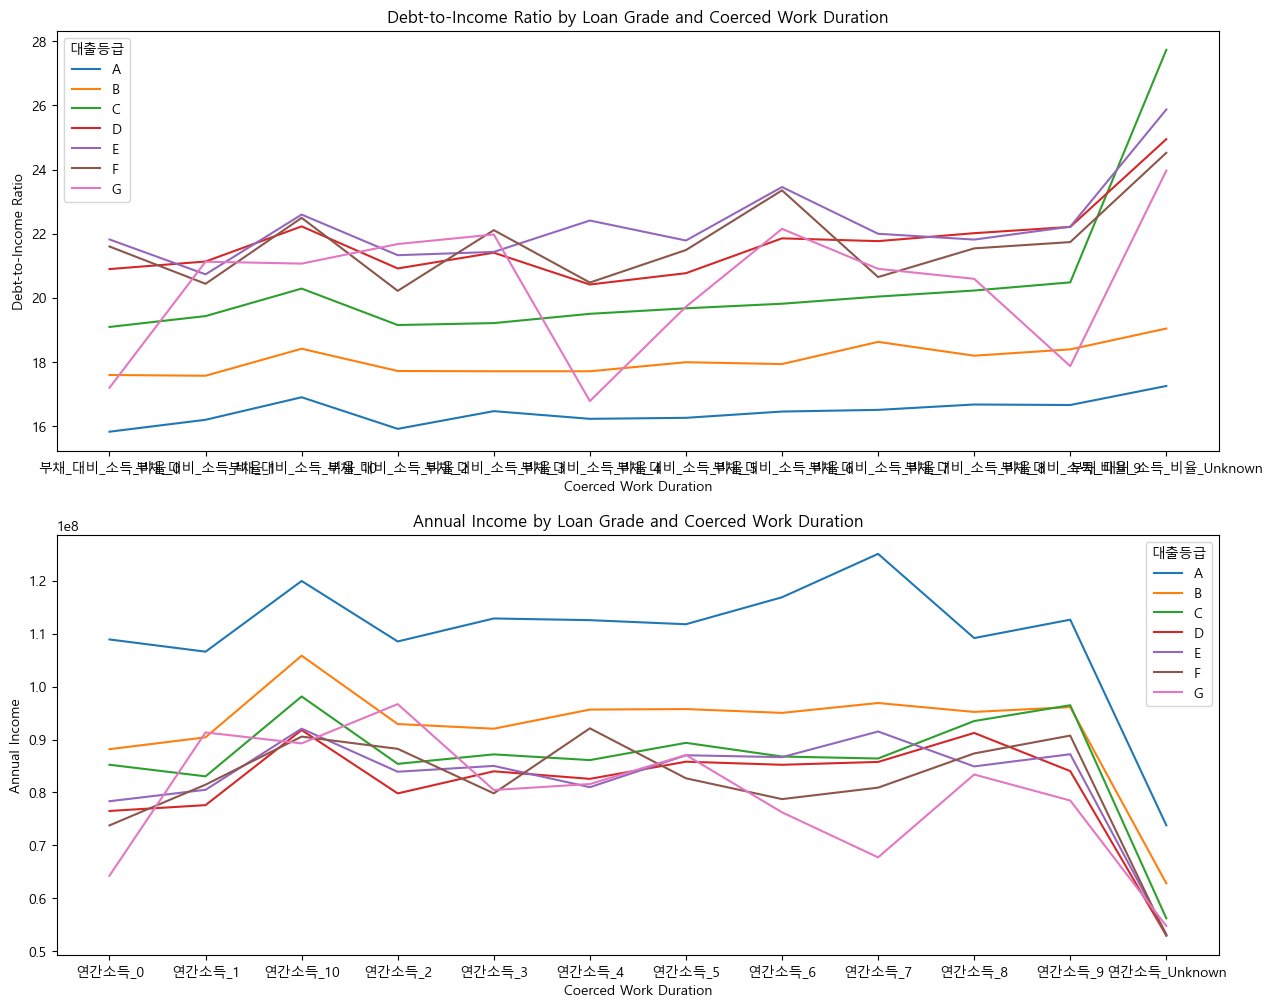

In [61]:
# Convert the multi-level column names to a single level by joining with an underscore
pivot_table.columns = ['_'.join(map(str, col)).strip() for col in pivot_table.columns.values]

# Melt the flattened pivot table for plotting
melted_pivot = pivot_table.reset_index().melt(id_vars='대출등급')

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Plot for Debt-to-Income Ratio
dti_data = melted_pivot[melted_pivot['variable'].str.contains('부채_대비_소득_비율')]
sns.lineplot(data=dti_data, x='variable', y='value', hue='대출등급', ax=axes[0])
axes[0].set_title('Debt-to-Income Ratio by Loan Grade and Coerced Work Duration')
axes[0].set_xlabel('Coerced Work Duration')
axes[0].set_ylabel('Debt-to-Income Ratio')

# Plot for Annual Income
income_data = melted_pivot[melted_pivot['variable'].str.contains('연간소득')]
sns.lineplot(data=income_data, x='variable', y='value', hue='대출등급', ax=axes[1])
axes[1].set_title('Annual Income by Loan Grade and Coerced Work Duration')
axes[1].set_xlabel('Coerced Work Duration')
axes[1].set_ylabel('Annual Income')

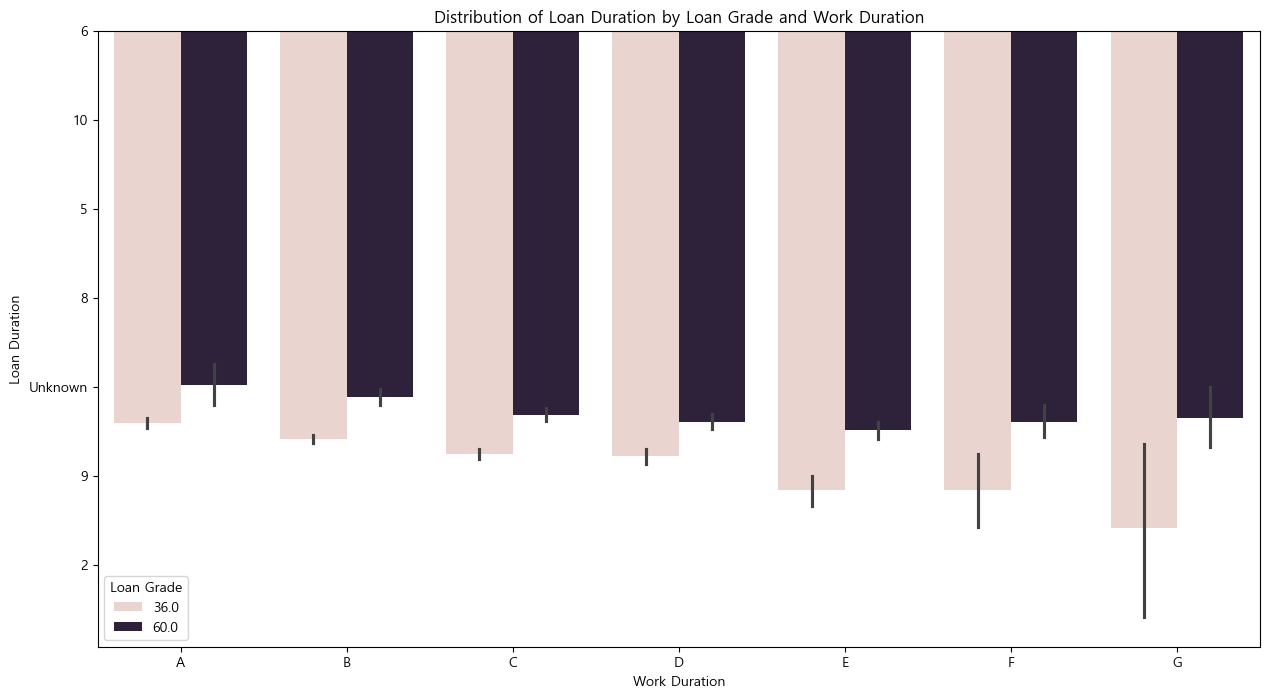

In [63]:
plt.figure(figsize=(15, 8))
sns.barplot(x='대출등급', y='근로기간', hue='대출기간', data=train_df)

plt.title('Distribution of Loan Duration by Loan Grade and Work Duration')
plt.xlabel('Work Duration')
plt.ylabel('Loan Duration')
plt.legend(title='Loan Grade')
plt.show()

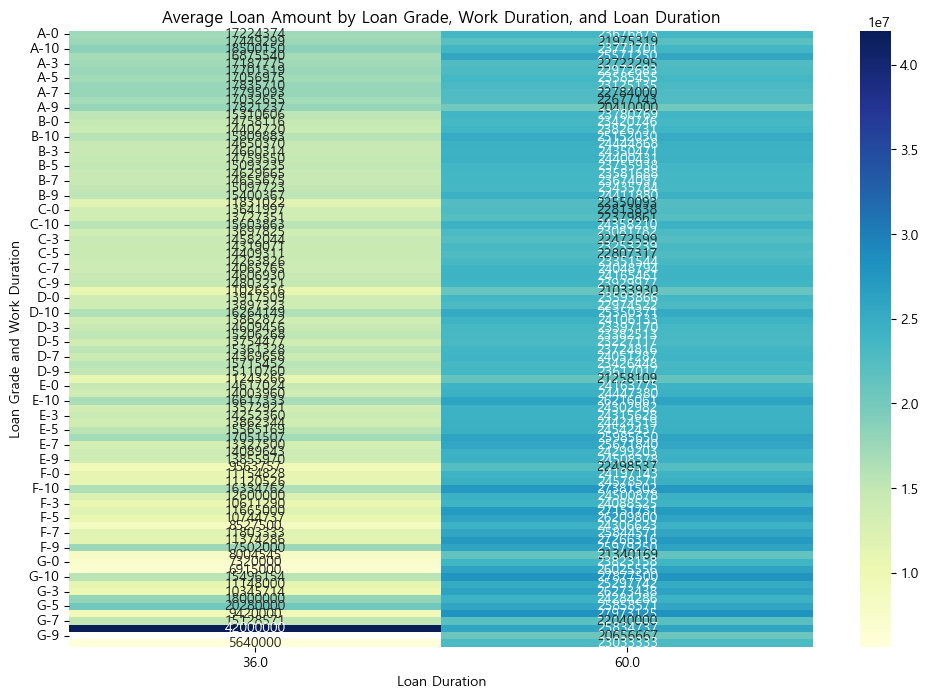

In [65]:
pivot_table = train_df.pivot_table(index=['대출등급', '근로기간'], columns='대출기간', values='대출금액')

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title('Average Loan Amount by Loan Grade, Work Duration, and Loan Duration')
plt.xlabel('Loan Duration')
plt.ylabel('Loan Grade and Work Duration')
plt.show()

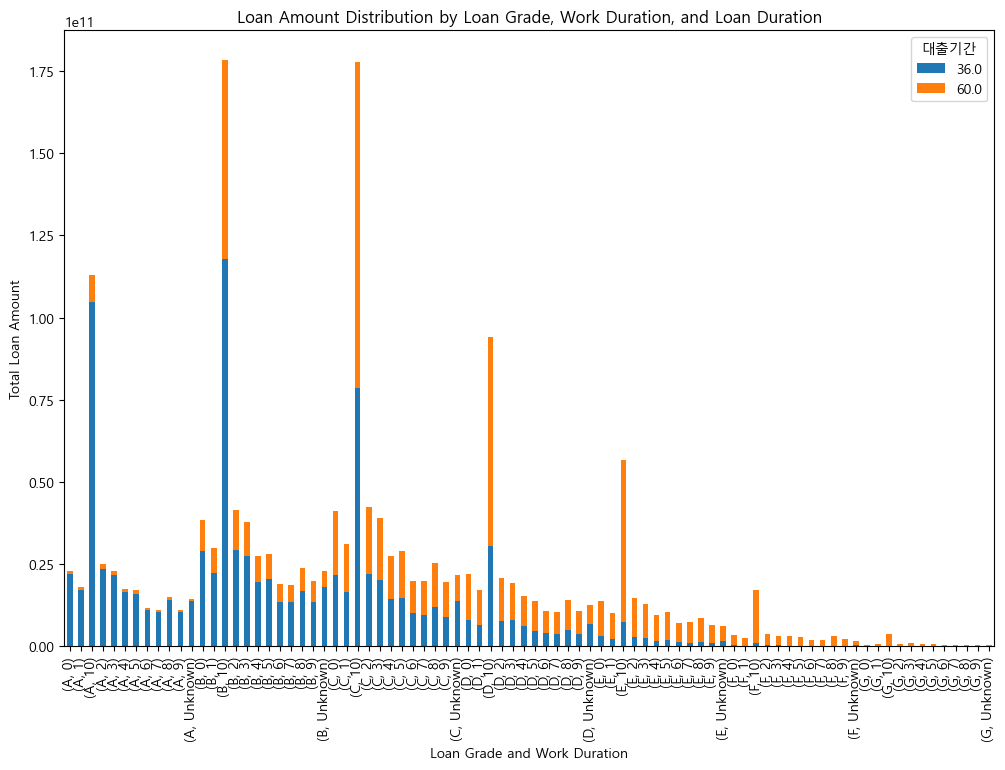

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pivot_table = train_df.pivot_table(index=['대출등급', '근로기간'], columns='대출기간', values='대출금액', aggfunc='sum')

# Plotting a stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Loan Amount Distribution by Loan Grade, Work Duration, and Loan Duration')
plt.xlabel('Loan Grade and Work Duration')
plt.ylabel('Total Loan Amount')
plt.show()

C:\Users\DOHS\AppData\Local\Temp\ipykernel_13340\4125101344.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=train_df, x='대출등급', y='연체계좌수', hue='근로기간', ci=None)


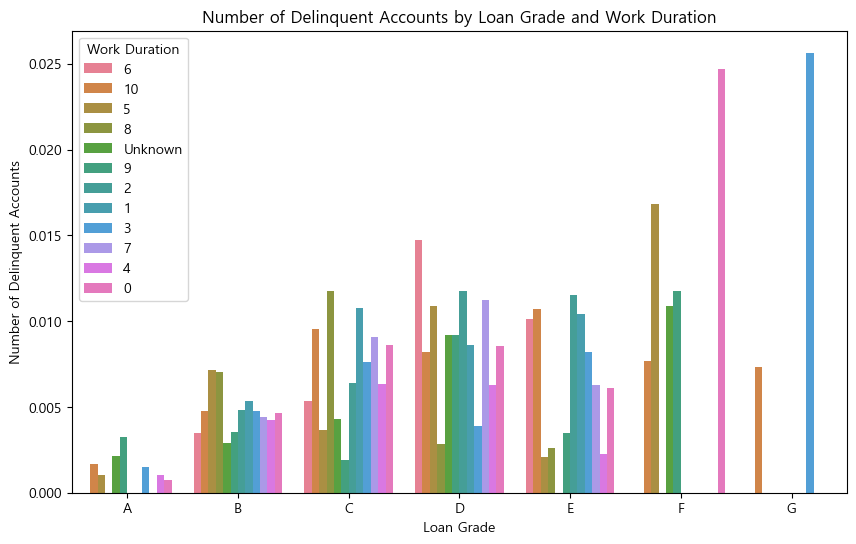

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='대출등급', y='연체계좌수', hue='근로기간', ci=None)
plt.title('Number of Delinquent Accounts by Loan Grade and Work Duration')
plt.xlabel('Loan Grade')
plt.ylabel('Number of Delinquent Accounts')
plt.legend(title='Work Duration')
plt.show()

신용등급이 낮을수록 근로기간종류에 따른 연체된 계좌수가 적음을 알수가 있음

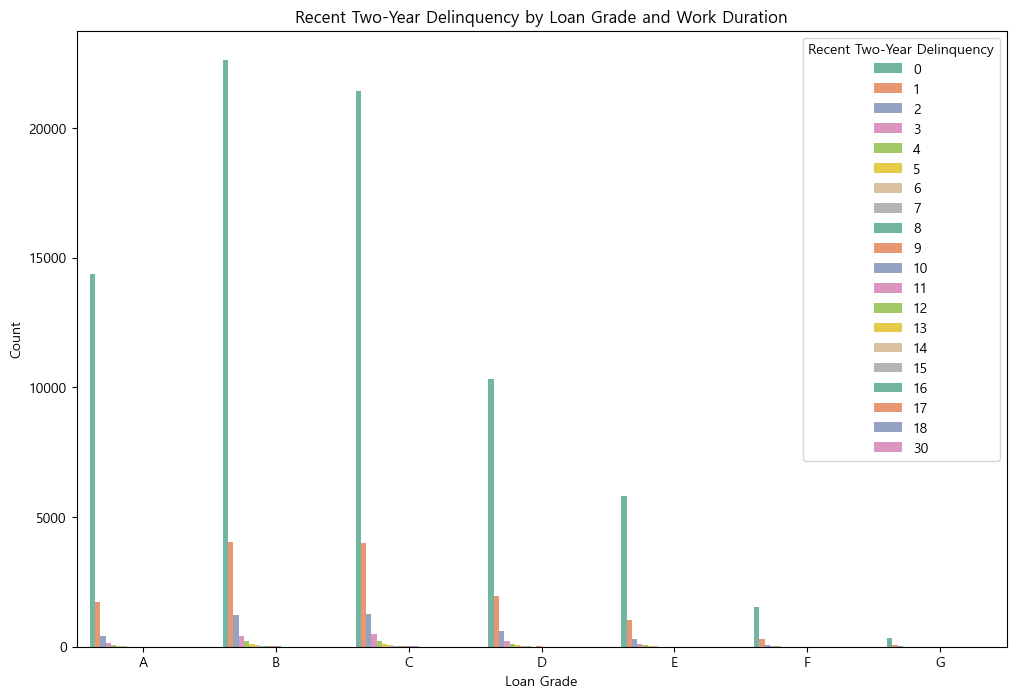

In [71]:
plt.figure(figsize=(12, 8))
sns.countplot(data=train_df, x='대출등급', hue='최근_2년간_연체_횟수', palette="Set2")

plt.title('Recent Two-Year Delinquency by Loan Grade and Work Duration')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.legend(title='Recent Two-Year Delinquency', loc='upper right')
plt.show()

연체 횟수가 적으면 적을수록 대출등급이 낮음
이유를 모르겠음- 에초에 빌려주지 않아서?

In [74]:
train_df.pivot_table(index='대출등급',columns='최근_2년간_연체_횟수',values='대출금액',aggfunc='mean')

최근_2년간_연체_횟수            0             1             2             3   \
대출등급                                                                   
A             1.794762e+07  1.790523e+07  1.785629e+07  1.646826e+07   
B             1.700586e+07  1.664096e+07  1.643678e+07  1.556485e+07   
C             1.789116e+07  1.802708e+07  1.802413e+07  1.718956e+07   
D             1.942988e+07  2.012861e+07  1.970017e+07  2.008146e+07   
E             2.213789e+07  2.290987e+07  2.395500e+07  2.334500e+07   
F             2.367385e+07  2.496427e+07  2.625112e+07  2.433568e+07   
G             2.364511e+07  2.374415e+07  2.527625e+07  2.631000e+07   

최근_2년간_연체_횟수            4             5             6             7   \
대출등급                                                                   
A             1.603200e+07  1.415364e+07  1.379143e+07  1.656000e+07   
B             1.483832e+07  1.492128e+07  1.452097e+07  1.463657e+07   
C             1.817974e+07  1.602477e+07  1.694077e+07  1.720250e+07   
D             1.715883e+07  2.068731e+07  1.818091e+07  2.184462e+07   
E             1.913020e+07  2.125038e+07  2.483786e+07  2.461500e+07   
F             2.677833e+07  2.640000e+07  2.232000e+07  3.354000e+07   
G             3.730500e+07           NaN  3.810000e+07  3.364500e+07   

최근_2년간_연체_횟수            8             9           10          11          12  \
대출등급                                                                           
A             1.275000e+07  1.740000e+07  14712000.0         NaN         NaN   
B             1.454889e+07  1.495500e+07  10920000.0  12405000.0  21850000.0   
C             1.598864e+07  1.203231e+07  17865000.0  12880000.0  16080000.0   
D             2.301375e+07  1.333091e+07  10800000.0  13050000.0  18600000.0   
E             2.136000e+07  1.824000e+07  25200000.0         NaN  25200000.0   
F             2.400000e+07  2.456000e+07  12960000.0         NaN         NaN   
G                      NaN           NaN         NaN         NaN         NaN   

최근_2년간_연체_횟수          13          14          15          16          17  \
대출등급                                                                       
A             12000000.0   8400000.0  16800000.0         NaN         NaN   
B             14497500.0   7200000.0         NaN  18600000.0         NaN   
C              5955000.0   7600000.0         NaN  22755000.0         NaN   
D                    NaN  26400000.0         NaN  11700000.0         NaN   
E              2580000.0         NaN  30000000.0         NaN         NaN   
F                    NaN         NaN         NaN         NaN         NaN   
G                    NaN         NaN         NaN         NaN  20160000.0   

최근_2년간_연체_횟수         18          30  
대출등급                                 
A             9600000.0         NaN  
B                   NaN         NaN  
C                   NaN  18000000.0  
D                   NaN         NaN  
E             6840000.0         NaN  
F                   NaN         NaN  
G                   NaN         NaN

In [75]:
train_df.pivot_table(index='대출등급', columns='최근_2년간_연체_횟수', values='최근_2년간_연체_횟수', aggfunc='size')

ValueError: Grouper for '최근_2년간_연체_횟수' not 1-dimensional

In [76]:
pivot_table = train_df.pivot_table(index='대출등급', columns='최근_2년간_연체_횟수', values='대출금액', aggfunc='mean')
pivot_table

최근_2년간_연체_횟수            0             1             2             3   \
대출등급                                                                   
A             1.794762e+07  1.790523e+07  1.785629e+07  1.646826e+07   
B             1.700586e+07  1.664096e+07  1.643678e+07  1.556485e+07   
C             1.789116e+07  1.802708e+07  1.802413e+07  1.718956e+07   
D             1.942988e+07  2.012861e+07  1.970017e+07  2.008146e+07   
E             2.213789e+07  2.290987e+07  2.395500e+07  2.334500e+07   
F             2.367385e+07  2.496427e+07  2.625112e+07  2.433568e+07   
G             2.364511e+07  2.374415e+07  2.527625e+07  2.631000e+07   

최근_2년간_연체_횟수            4             5             6             7   \
대출등급                                                                   
A             1.603200e+07  1.415364e+07  1.379143e+07  1.656000e+07   
B             1.483832e+07  1.492128e+07  1.452097e+07  1.463657e+07   
C             1.817974e+07  1.602477e+07  1.694077e+07  1.720250e+07   
D             1.715883e+07  2.068731e+07  1.818091e+07  2.184462e+07   
E             1.913020e+07  2.125038e+07  2.483786e+07  2.461500e+07   
F             2.677833e+07  2.640000e+07  2.232000e+07  3.354000e+07   
G             3.730500e+07           NaN  3.810000e+07  3.364500e+07   

최근_2년간_연체_횟수            8             9           10          11          12  \
대출등급                                                                           
A             1.275000e+07  1.740000e+07  14712000.0         NaN         NaN   
B             1.454889e+07  1.495500e+07  10920000.0  12405000.0  21850000.0   
C             1.598864e+07  1.203231e+07  17865000.0  12880000.0  16080000.0   
D             2.301375e+07  1.333091e+07  10800000.0  13050000.0  18600000.0   
E             2.136000e+07  1.824000e+07  25200000.0         NaN  25200000.0   
F             2.400000e+07  2.456000e+07  12960000.0         NaN         NaN   
G                      NaN           NaN         NaN         NaN         NaN   

최근_2년간_연체_횟수          13          14          15          16          17  \
대출등급                                                                       
A             12000000.0   8400000.0  16800000.0         NaN         NaN   
B             14497500.0   7200000.0         NaN  18600000.0         NaN   
C              5955000.0   7600000.0         NaN  22755000.0         NaN   
D                    NaN  26400000.0         NaN  11700000.0         NaN   
E              2580000.0         NaN  30000000.0         NaN         NaN   
F                    NaN         NaN         NaN         NaN         NaN   
G                    NaN         NaN         NaN         NaN  20160000.0   

최근_2년간_연체_횟수         18          30  
대출등급                                 
A             9600000.0         NaN  
B                   NaN         NaN  
C                   NaN  18000000.0  
D                   NaN         NaN  
E             6840000.0         NaN  
F                   NaN         NaN  
G                   NaN         NaN

In [77]:
pivot_table.T.sort_values(by="A")

대출등급                     A             B             C             D  \
최근_2년간_연체_횟수                                                           
14            8.400000e+06  7.200000e+06  7.600000e+06  2.640000e+07   
18            9.600000e+06           NaN           NaN           NaN   
13            1.200000e+07  1.449750e+07  5.955000e+06           NaN   
8             1.275000e+07  1.454889e+07  1.598864e+07  2.301375e+07   
6             1.379143e+07  1.452097e+07  1.694077e+07  1.818091e+07   
5             1.415364e+07  1.492128e+07  1.602477e+07  2.068731e+07   
10            1.471200e+07  1.092000e+07  1.786500e+07  1.080000e+07   
4             1.603200e+07  1.483832e+07  1.817974e+07  1.715883e+07   
3             1.646826e+07  1.556485e+07  1.718956e+07  2.008146e+07   
7             1.656000e+07  1.463657e+07  1.720250e+07  2.184462e+07   
15            1.680000e+07           NaN           NaN           NaN   
9             1.740000e+07  1.495500e+07  1.203231e+07  1.333091e+07   
2             1.785629e+07  1.643678e+07  1.802413e+07  1.970017e+07   
1             1.790523e+07  1.664096e+07  1.802708e+07  2.012861e+07   
0             1.794762e+07  1.700586e+07  1.789116e+07  1.942988e+07   
11                     NaN  1.240500e+07  1.288000e+07  1.305000e+07   
12                     NaN  2.185000e+07  1.608000e+07  1.860000e+07   
16                     NaN  1.860000e+07  2.275500e+07  1.170000e+07   
17                     NaN           NaN           NaN           NaN   
30                     NaN           NaN  1.800000e+07           NaN   

대출등급                     E             F             G  
최근_2년간_연체_횟수                                            
14                     NaN           NaN           NaN  
18            6.840000e+06           NaN           NaN  
13            2.580000e+06           NaN           NaN  
8             2.136000e+07  2.400000e+07           NaN  
6             2.483786e+07  2.232000e+07  3.810000e+07  
5             2.125038e+07  2.640000e+07           NaN  
10            2.520000e+07  1.296000e+07           NaN  
4             1.913020e+07  2.677833e+07  3.730500e+07  
3             2.334500e+07  2.433568e+07  2.631000e+07  
7             2.461500e+07  3.354000e+07  3.364500e+07  
15            3.000000e+07           NaN           NaN  
9             1.824000e+07  2.456000e+07           NaN  
2             2.395500e+07  2.625112e+07  2.527625e+07  
1             2.290987e+07  2.496427e+07  2.374415e+07  
0             2.213789e+07  2.367385e+07  2.364511e+07  
11                     NaN           NaN           NaN  
12            2.520000e+07           NaN           NaN  
16                     NaN           NaN           NaN  
17                     NaN           NaN  2.016000e+07  
30                     NaN           NaN           NaN

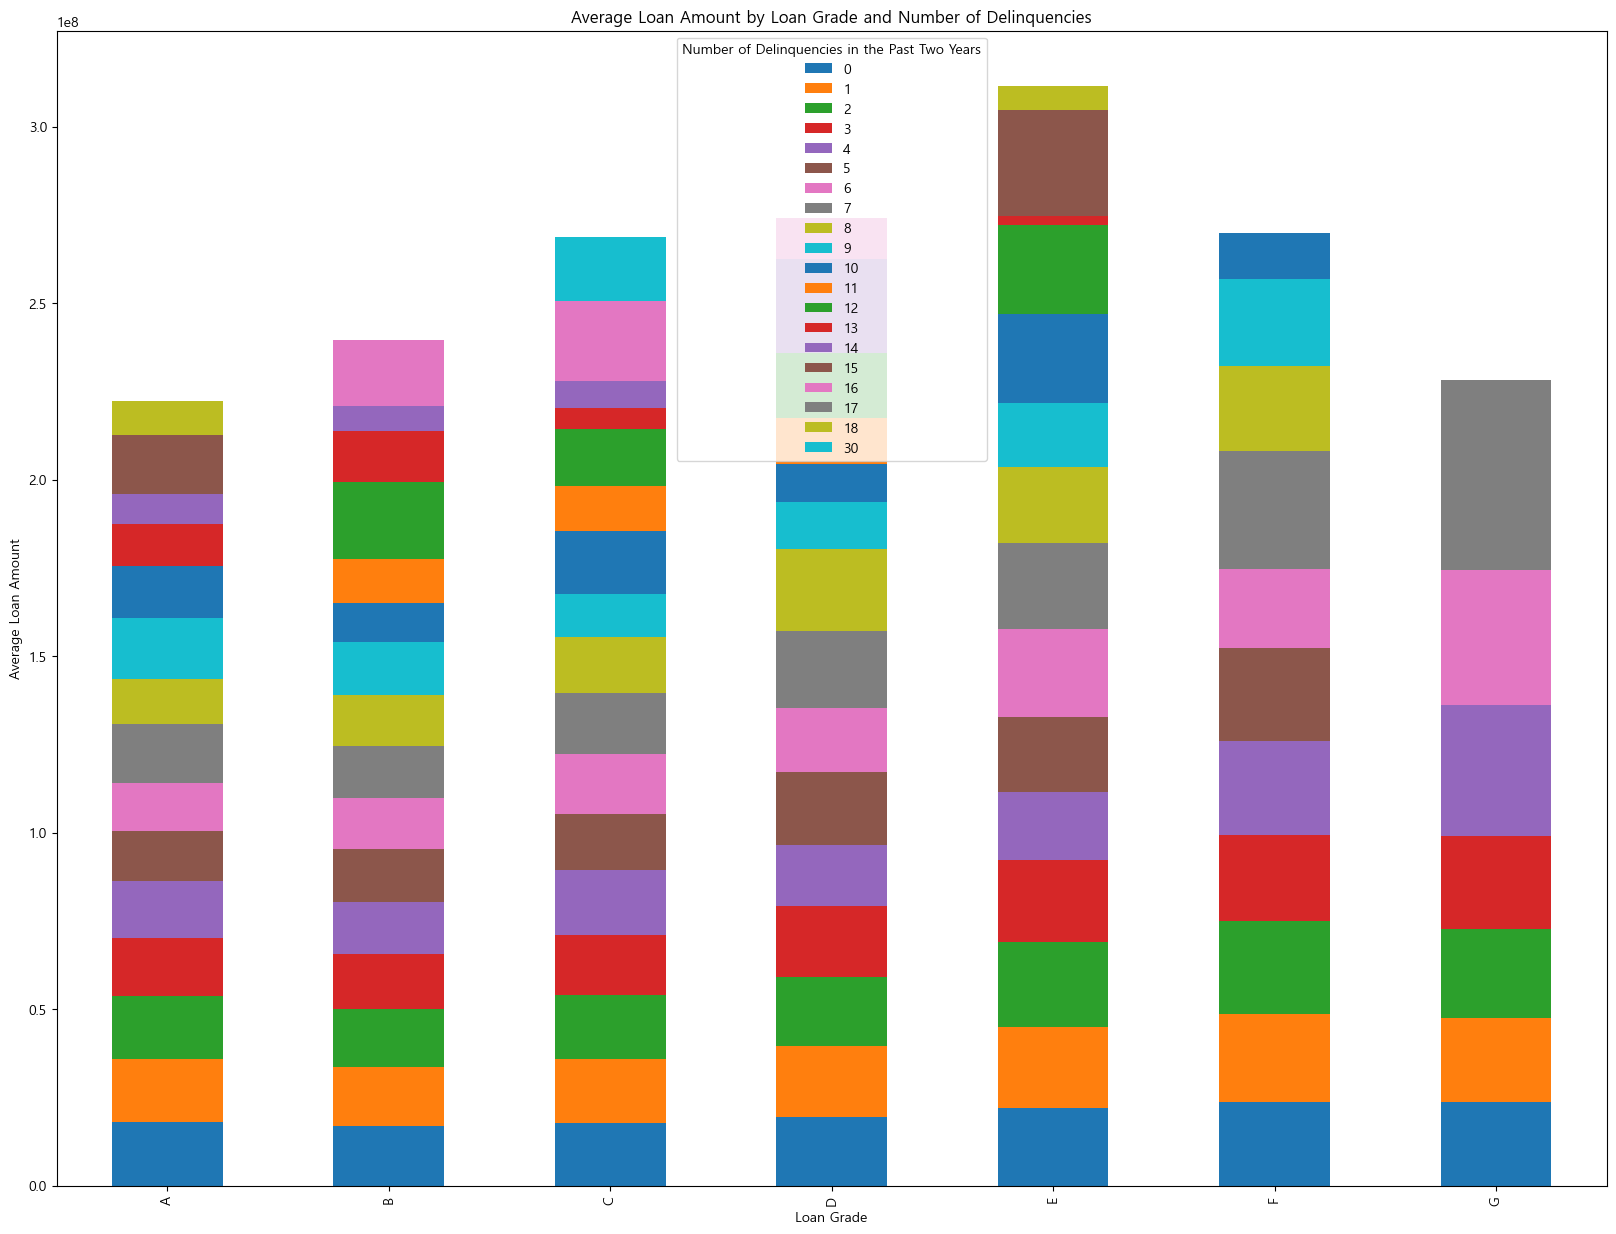

In [79]:
pivot_table = train_df.pivot_table(index='대출등급', columns='최근_2년간_연체_횟수', values='대출금액', aggfunc='mean')

# Plotting the pivot table
pivot_table.plot(kind='bar', stacked=True, figsize=(20, 15))
plt.title('Average Loan Amount by Loan Grade and Number of Delinquencies')
plt.xlabel('Loan Grade')
plt.ylabel('Average Loan Amount')
plt.legend(title='Number of Delinquencies in the Past Two Years')
plt.show()

In [81]:
corrected_pivot_table = train_df.pivot_table(index='대출등급', 
                                               columns='최근_2년간_연체_횟수', 
                                               values='최근_2년간_연체_횟수', 
                                               aggfunc='size')

ValueError: Grouper for '최근_2년간_연체_횟수' not 1-dimensional

# 2


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from catboost import CatBoostClassifier, Pool

In [86]:
from tqdm.notebook import tqdm

In [87]:
import warnings
warnings.filterwarnings('ignore')

categorical data EDA

In [88]:
def credits_level_counts(col):

    unique_list = list(train_df[col].unique())
    
    for unique in unique_list:
    
        cond_unique = (train_df[col]==unique)
        print(unique)
        print(train_df.loc[cond_unique]['대출등급'].value_counts())
        print()

In [89]:
hue_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [90]:
list_cat = ['대출기간', '근로기간', '주택소유상태', '대출목적']

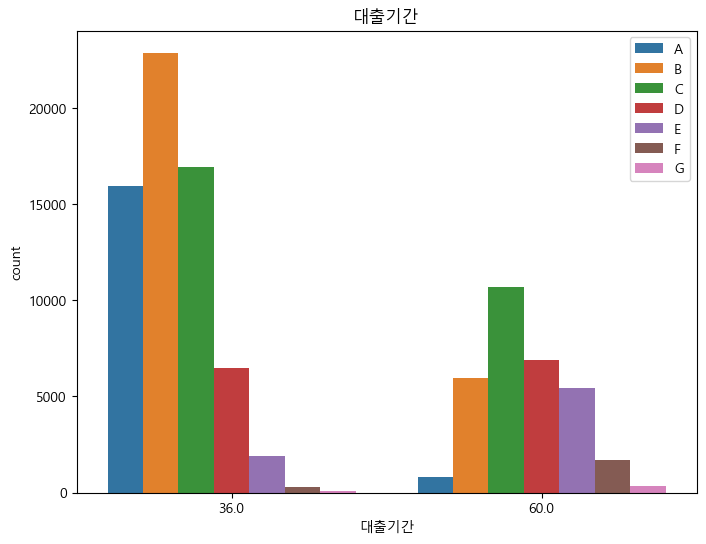


36.0
대출등급
B    22883
C    16935
A    15952
D     6485
E     1895
F      270
G       59
Name: count, dtype: int64

60.0
대출등급
C    10688
D     6869
B     5934
E     5459
F     1684
A      820
G      361
Name: count, dtype: int64



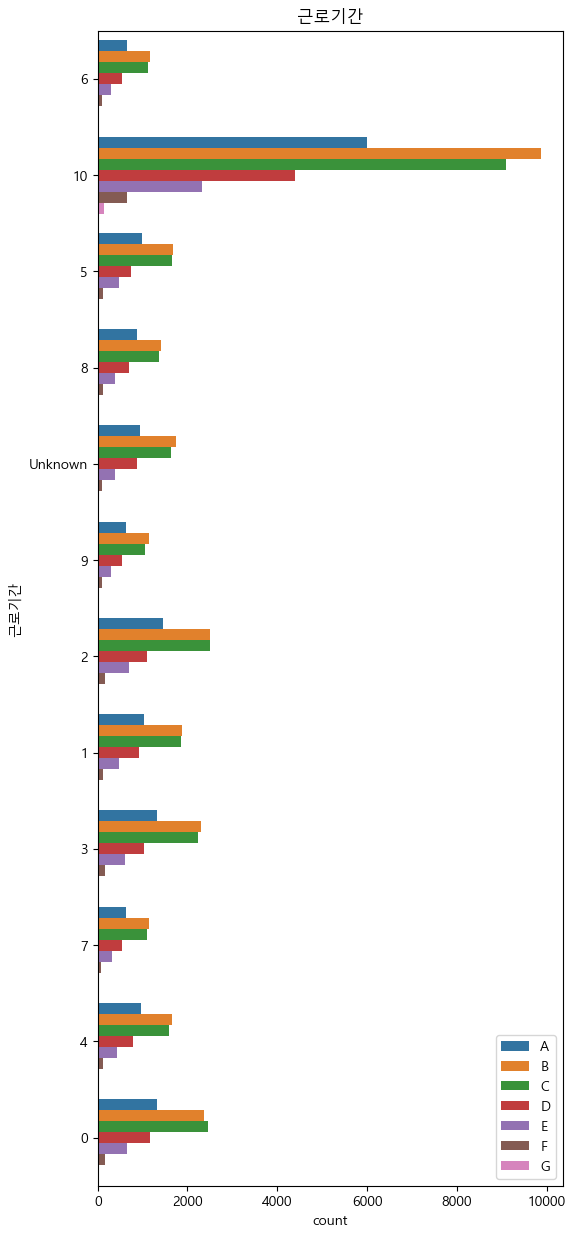


6
대출등급
B    1157
C    1124
A     650
D     543
E     296
F      85
G      19
Name: count, dtype: int64

10
대출등급
B    9865
C    9105
A    6009
D    4385
E    2331
F     649
G     137
Name: count, dtype: int64

5
대출등급
B    1679
C    1646
A     986
D     736
E     475
F     119
G      24
Name: count, dtype: int64

8
대출등급
B    1417
C    1364
A     867
D     707
E     385
F     128
G      20
Name: count, dtype: int64

Unknown
대출등급
B    1742
C    1628
A     934
D     872
E     378
F      92
G      25
Name: count, dtype: int64

9
대출등급
B    1137
C    1049
A     621
D     545
E     289
F      85
G      18
Name: count, dtype: int64

2
대출등급
C    2495
B    2493
A    1454
D    1107
E     695
F     170
G      36
Name: count, dtype: int64

1
대출등급
B    1867
C    1860
A    1031
D     927
E     481
F     110
G      29
Name: count, dtype: int64

3
대출등급
B    2302
C    2225
A    1315
D    1028
E     608
F     153
G      39
Name: count, dtype: int64

7
대출등급
B    1138
C    1103
A     619
D     535
E     318

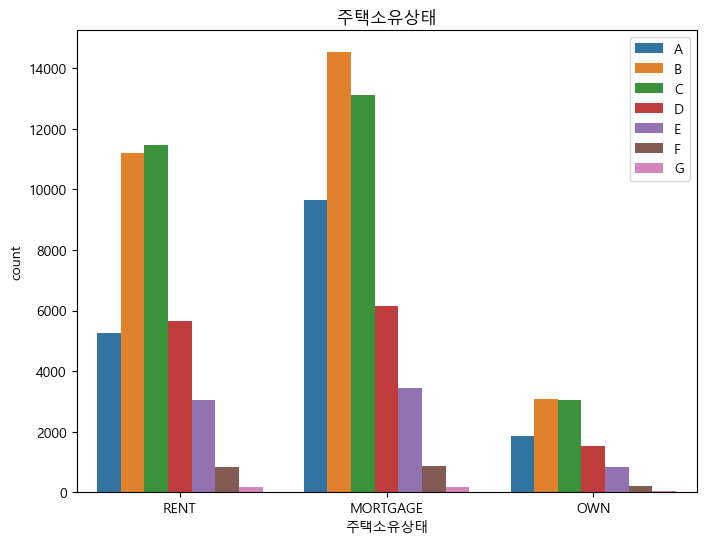


RENT
대출등급
C    11478
B    11200
D     5653
A     5268
E     3056
F      855
G      195
Name: count, dtype: int64

MORTGAGE
대출등급
B    14518
C    13107
A     9640
D     6163
E     3452
F      883
G      172
Name: count, dtype: int64

OWN
대출등급
B    3099
C    3038
A    1864
D    1538
E     846
F     216
G      53
Name: count, dtype: int64



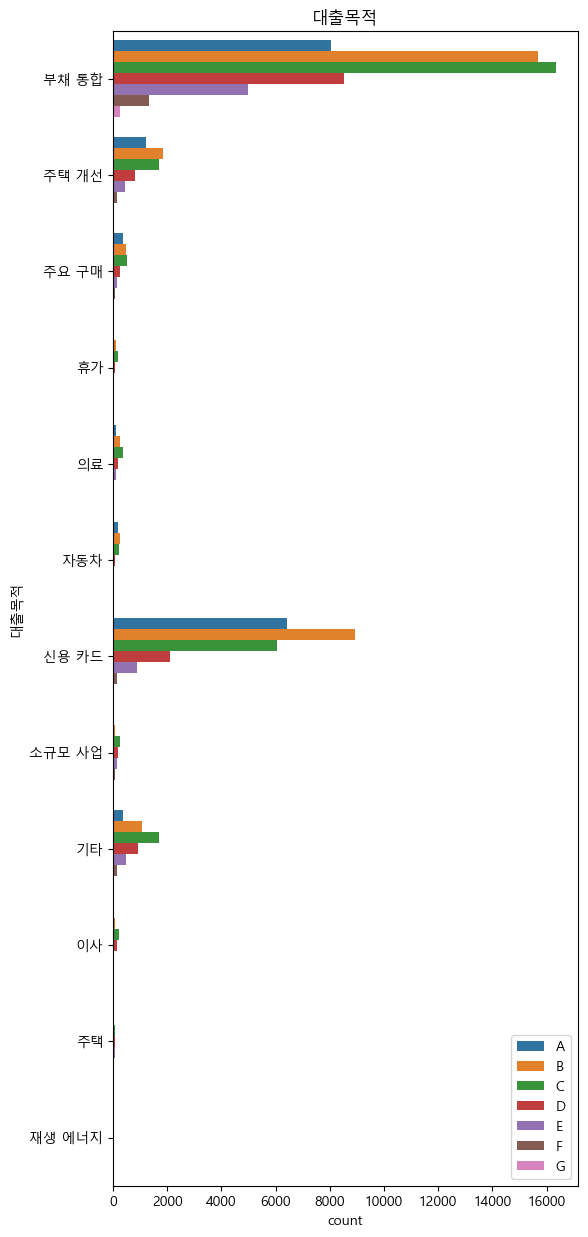


부채 통합
대출등급
C    16349
B    15680
D     8529
A     8036
E     4979
F     1311
G      266
Name: count, dtype: int64

주택 개선
대출등급
B    1845
C    1689
A    1225
D     805
E     425
F     145
G      26
Name: count, dtype: int64

주요 구매
대출등급
C    503
B    479
A    372
D    238
E    150
F     53
G      8
Name: count, dtype: int64

휴가
대출등급
C    196
B    119
D     78
A     40
E     27
F      4
G      2
Name: count, dtype: int64

의료
대출등급
C    375
B    238
D    197
A    104
E     91
F     27
G      7
Name: count, dtype: int64

자동차
대출등급
B    258
C    213
A    174
D     87
E     46
F     15
G      4
Name: count, dtype: int64

신용 카드
대출등급
B    8917
A    6424
C    6036
D    2092
E     877
F     137
G      17
Name: count, dtype: int64

소규모 사업
대출등급
C    249
D    192
E    158
B     75
F     64
G     30
A     19
Name: count, dtype: int64

기타
대출등급
C    1705
B    1080
D     916
E     478
A     356
F     147
G      43
Name: count, dtype: int64

이사
대출등급
C    203
D    131
B     86
E     50
F     18
A     13
G  

In [99]:
for col in list_cat:

    if col in ['근로기간', '대출목적']:

       plt.figure(figsize=(6,15))
       sns.countplot(data=train_df,y=col, hue='대출등급', hue_order=hue_order)
       plt.title(col)
       plt.legend(loc='lower right')
       plt.show()
       print()
       credits_level_counts(col=col)

    else:

        plt.figure(figsize=(8,6))
        sns.countplot(data=train_df, x=col, hue='대출등급', hue_order=hue_order)
        plt.title(col)
        plt.legend(loc='upper right')
        plt.show()
        print()
        credits_level_counts(col=col)

Numerical data

In [100]:
list_num = ['연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수',
            '총상환원금', '총상환이자', '총연체금액', '연체계좌수']

In [101]:
def num_statistic(data, col):
    statistic_df = pd.DataFrame()

    for level in hue_order:
        level_df = data.loc[(data['대출등급']==level)][[col]].describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
        level_df.index = [level]
        
        statistic_df = pd.concat([statistic_df, level_df], axis=0)

    display(statistic_df)
    print()

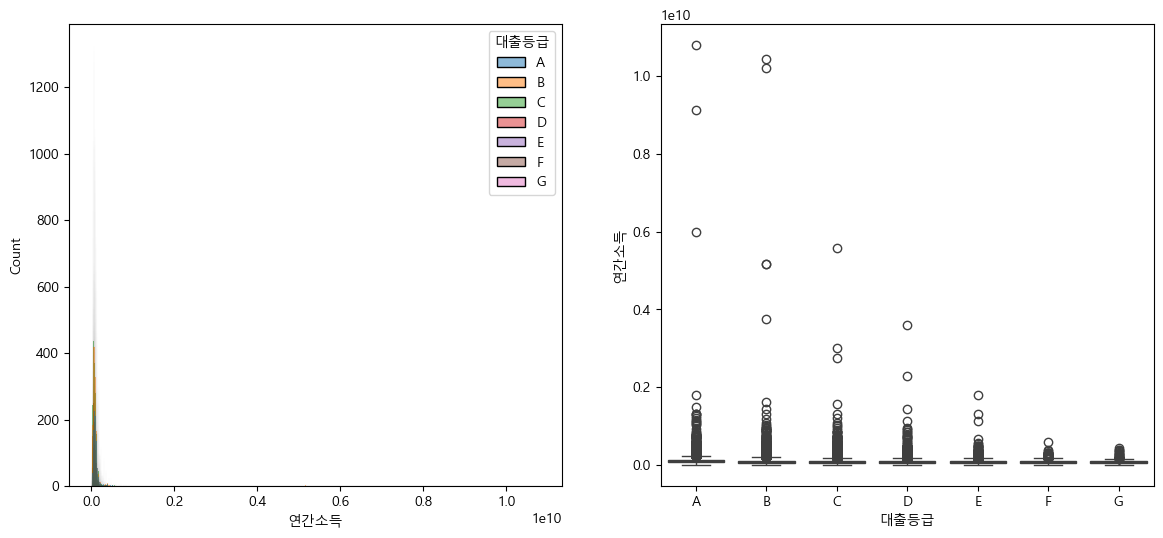

mean           std         min         25%         50%  \
A  1.124911e+08  1.396115e+08  11424000.0  67200000.0  96000000.0   
B  9.570640e+07  1.160385e+08   9600000.0  58386000.0  81600000.0   
C  8.903804e+07  7.227919e+07         0.0  54000000.0  75600000.0   
D  8.359673e+07  6.622318e+07   2124000.0  51454800.0  72000000.0   
E  8.492864e+07  5.582495e+07   1440000.0  54000000.0  73200000.0   
F  8.434506e+07  4.500624e+07  10627200.0  54000000.0  75430800.0   
G  8.258034e+07  5.407082e+07  10555200.0  50400000.0  70800000.0   

           75%           max  
A  132000000.0  1.080000e+10  
B  114000000.0  1.044000e+10  
C  108000000.0  5.576640e+09  
D  100800000.0  3.600000e+09  
E  102000000.0  1.800000e+09  
F  102000000.0  6.000000e+08  
G   96000000.0  4.344000e+08

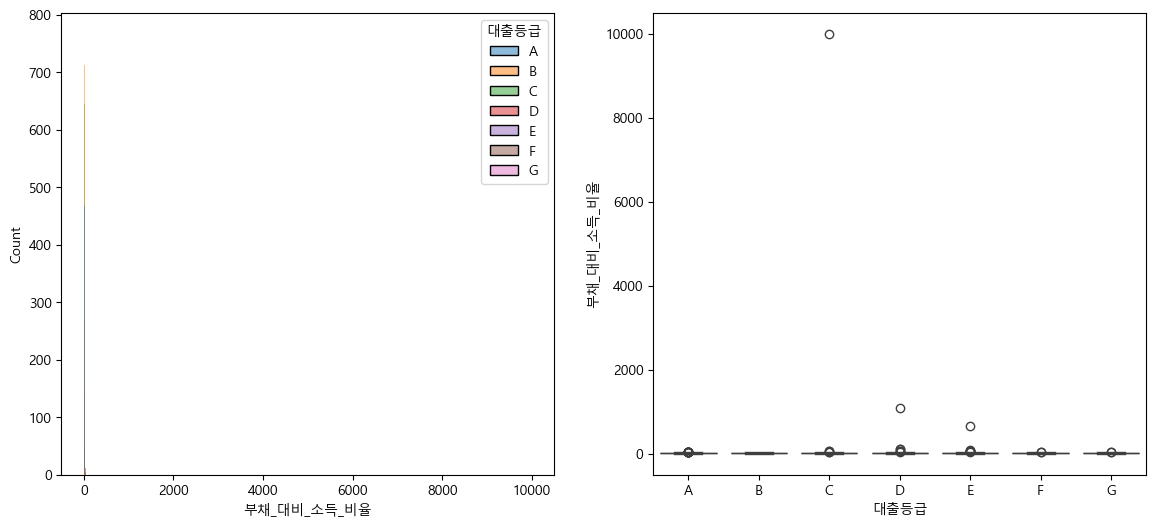

mean        std   min      25%     50%      75%      max
A  16.547850   7.558913  0.00  10.8200  16.130  21.8700    39.80
B  18.129529   8.191684  0.00  11.9300  17.600  23.9800    41.69
C  20.270095  60.681872  0.00  13.3000  19.510  26.3050  9999.00
D  21.808465  13.166067  0.00  14.6900  21.610  29.1575  1092.52
E  22.248466  11.977395  0.16  15.3500  21.925  29.2875   672.52
F  21.853710   8.913153  0.66  15.3925  22.125  28.3375    54.36
G  20.691952   8.718104  0.82  14.3525  21.095  26.5350    47.61

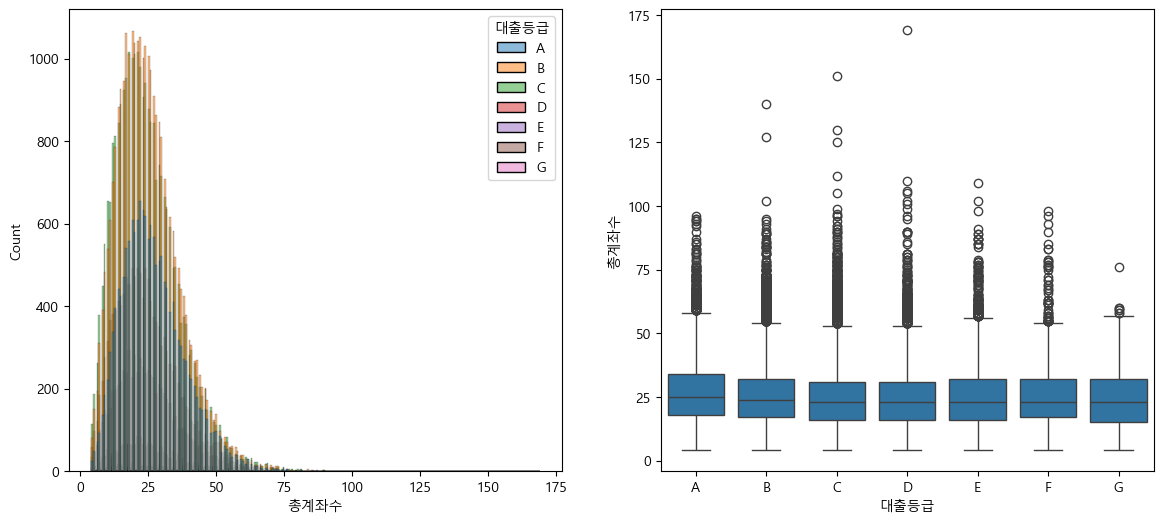

mean        std  min   25%   50%   75%    max
A  26.910684  11.788615  4.0  18.0  25.0  34.0   96.0
B  25.223375  11.765557  4.0  17.0  24.0  32.0  140.0
C  24.695073  12.195646  4.0  16.0  23.0  31.0  151.0
D  24.705107  12.357153  4.0  16.0  23.0  31.0  169.0
E  25.320642  12.522195  4.0  16.0  23.0  32.0  109.0
F  25.543501  12.950036  4.0  17.0  23.0  32.0   98.0
G  24.550000  12.482346  4.0  15.0  23.0  32.0   76.0

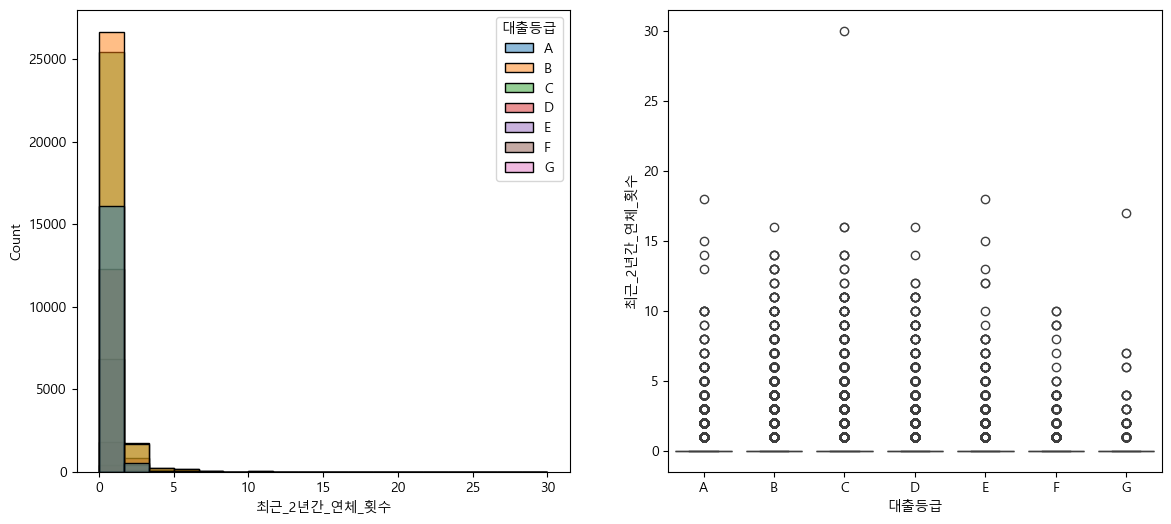

mean       std  min  25%  50%  75%   max
A  0.218698  0.704163  0.0  0.0  0.0  0.0  18.0
B  0.365409  0.947582  0.0  0.0  0.0  0.0  16.0
C  0.380299  0.966606  0.0  0.0  0.0  0.0  30.0
D  0.384379  0.970777  0.0  0.0  0.0  0.0  16.0
E  0.349334  0.914513  0.0  0.0  0.0  0.0  18.0
F  0.361822  0.914466  0.0  0.0  0.0  0.0  10.0
G  0.416667  1.239835  0.0  0.0  0.0  0.0  17.0

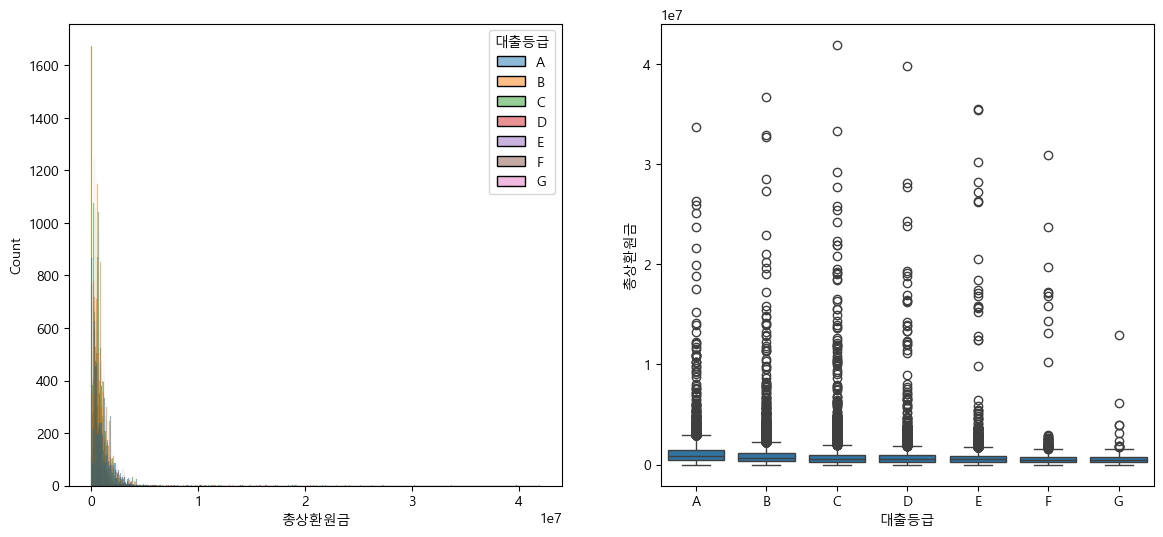

mean           std  min       25%       50%        75%         max
A  1.066966e+06  1.076776e+06  0.0  444804.0  830280.0  1441248.0  33683988.0
B  8.340144e+05  9.403085e+05  0.0  318336.0  606564.0  1101888.0  36721164.0
C  7.521078e+05  9.753910e+05  0.0  278616.0  552132.0   963672.0  41955936.0
D  7.297173e+05  1.018910e+06  0.0  267948.0  528600.0   908784.0  39793896.0
E  7.074507e+05  1.238723e+06  0.0  288672.0  523908.0   872802.0  35550000.0
F  6.673177e+05  1.368616e+06  0.0  267030.0  490224.0   794940.0  30911292.0
G  5.870190e+05  8.149610e+05  0.0  229296.0  442188.0   764745.0  12937416.0

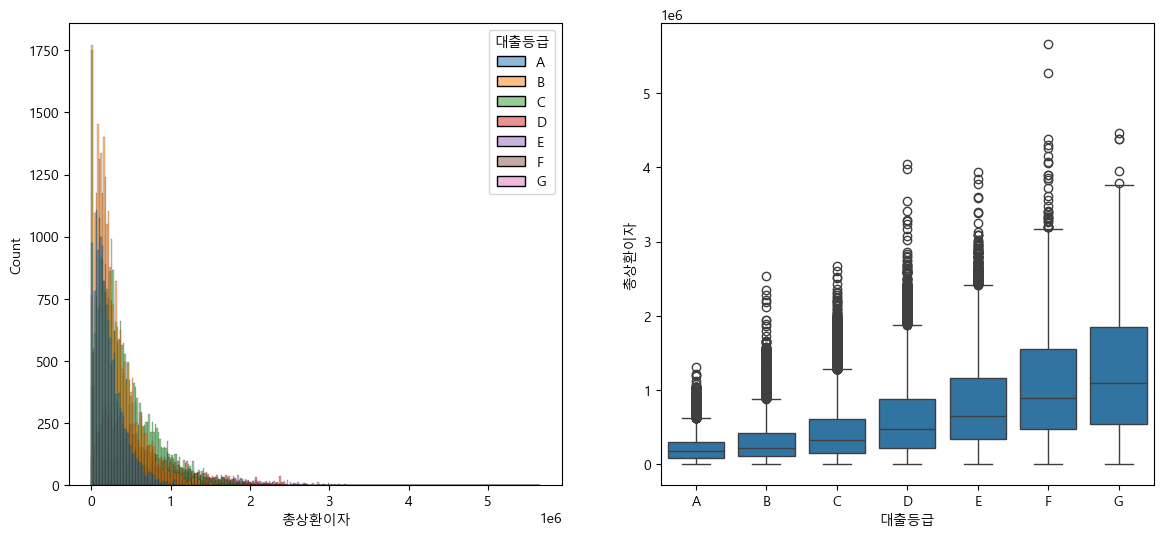

mean            std  min       25%        50%        75%        max
A  2.240085e+05  183508.609726  0.0   91401.0   175632.0   306678.0  1315908.0
B  3.033410e+05  268912.292532  0.0  110652.0   222228.0   421008.0  2538084.0
C  4.306745e+05  377468.910481  0.0  154560.0   323028.0   607092.0  2671956.0
D  6.117896e+05  520056.028372  0.0  220875.0   474684.0   884532.0  4048740.0
E  8.146975e+05  627671.231203  0.0  338886.0   653004.0  1168896.0  3942252.0
F  1.095274e+06  819704.001437  0.0  470883.0   900930.0  1548396.0  5653416.0
G  1.284655e+06  952955.115509  0.0  549405.0  1089972.0  1844562.0  4464612.0

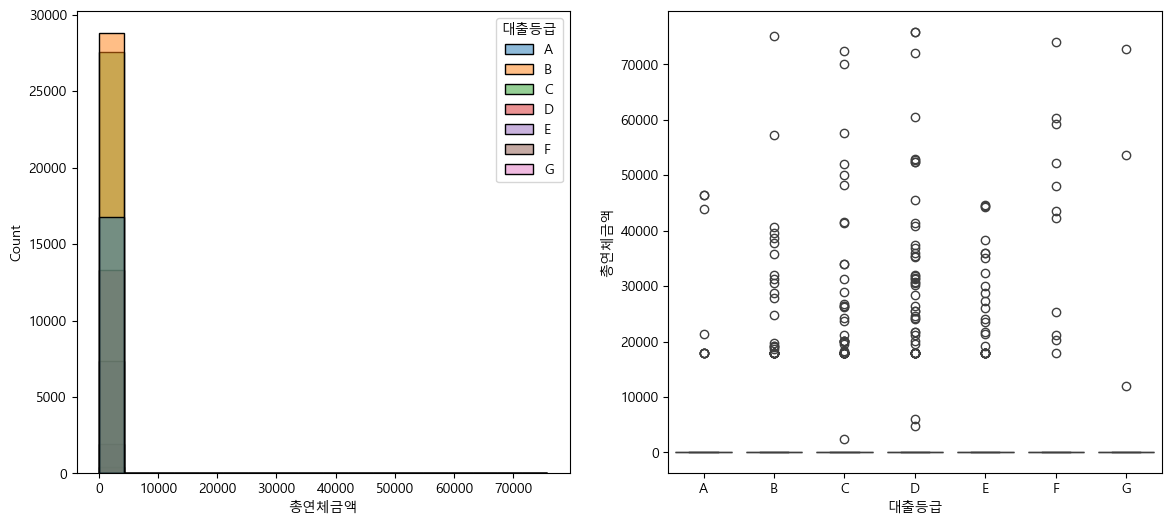

mean          std  min  25%  50%  75%      max
A   14.806105   704.850463  0.0  0.0  0.0  0.0  46536.0
B   29.441371   983.715162  0.0  0.0  0.0  0.0  75216.0
C   48.052565  1258.793440  0.0  0.0  0.0  0.0  72444.0
D  113.352104  2127.823877  0.0  0.0  0.0  0.0  75768.0
E   94.572206  1678.616326  0.0  0.0  0.0  0.0  44688.0
F  237.801433  3437.789928  0.0  0.0  0.0  0.0  74076.0
G  329.942857  4448.705070  0.0  0.0  0.0  0.0  72864.0

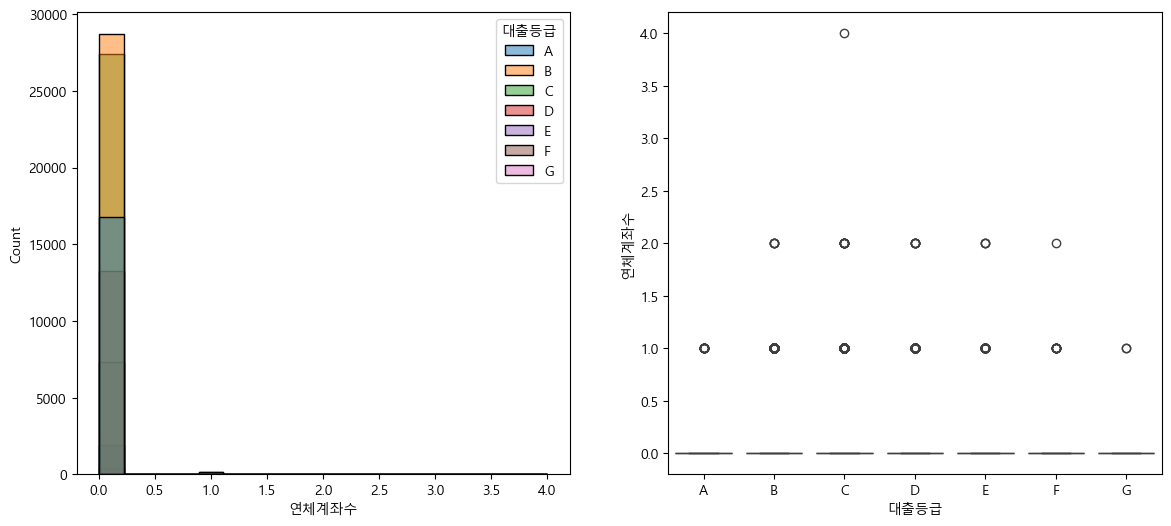

mean       std  min  25%  50%  75%  max
A  0.001133  0.033640  0.0  0.0  0.0  0.0  1.0
B  0.004789  0.071019  0.0  0.0  0.0  0.0  2.0
C  0.007892  0.094808  0.0  0.0  0.0  0.0  4.0
D  0.008462  0.096382  0.0  0.0  0.0  0.0  2.0
E  0.007615  0.091509  0.0  0.0  0.0  0.0  2.0
F  0.006653  0.087385  0.0  0.0  0.0  0.0  2.0
G  0.004762  0.068924  0.0  0.0  0.0  0.0  1.0

In [102]:
for col in list_num:
    
    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(14, 6))
    sns.histplot(data=train_df, x=col, hue='대출등급', ax=ax[0])
    sns.boxplot(data=train_df, y=col, x='대출등급', order=hue_order, ax=ax[1])
    plt.show()
    num_statistic(train_df, col)